**Background:**

We are a portfolio investment company and we make investments in the emerging markets around the world. Our company profits by investing in profitable companies, buying, holding and selling company stocks based on value investing principles.

Our goal is to establish a robust intelligent system to aid our value investing efforts using stock market data. We make investment decisions and based on intrinsic value of companies and do not trade on the basis of daily market volatility. Our profit realization strategy typically involves weekly, monthly and quarterly performance of stocks we buy or hold.

**Data Description:**

You are given a set of portfolio companies trading data from emerging markets including 2020 Q1-Q2-Q3-Q4 2021 Q1 stock prices. Each company stock is provided in different sheets. Each market's operating days varies based on the country of the company and the market the stocks are exchanged. Use only 2020 data and predict with 2021 Q1 data.

**Goal(s):**

Predict stock price valuations on a daily, weekly and monthly basis. Recommend BUY, HOLD, SELL decisions. Maximize capital returns, minimize losses. Ideally a loss should never happen. Minimize HOLD period.

**Success Metrics:**

Evaluate on the basis of capital returns. Use Bollinger Bands to measure your systems effectiveness.

In this notebook, we will predict the stock price for 8 different companies by using both analysing and models python files.

**analysing.py**, will be used for:

* Data preprocessing
* Make the time series stationary
* Add new features (with testing different features with different models)
* Plotting some stat.

**models.py**, will be used for:

* Train/ Test/ Val split
* Test Arima, Sarima, Arimax, Prophet, LSTM with univariate once and the other with multivariate as well as with Cnn LSTM models.
* Apply the Bollinger Bands strategy.

In [1]:
import warnings
warnings.filterwarnings('ignore')
from analysis import analysis_report
from models import models_report

2022-07-12 00:23:25.997843: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-12 00:23:25.997865: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


**Sberbank Rossii Dataset (SBER)**

The first 5 rows of the SBER data set: 

                  Date   Price    Open    High     Low    Vol.  Change %
0  2021-03-31 00:00:00  291.02   294.0  294.42  290.26  47.00M   -0.0076
1  2021-03-30 00:00:00  293.25  294.86  295.72   291.5  38.81M   -0.0002
2  2021-03-29 00:00:00   293.3  289.72  294.09  289.26  43.68M    0.0071
3  2021-03-26 00:00:00  291.22  288.63  292.75  288.32  56.07M    0.0159
4  2021-03-25 00:00:00  286.66   286.5  287.03  283.85  35.22M    0.0030

******************************************************************************************************************************************************
The original price values: 
The time series is not stationary and the p-value is 0.7582066363876816
The price values after difference: 
The time series is stationary and the p-value is 4.614666802733154e-07


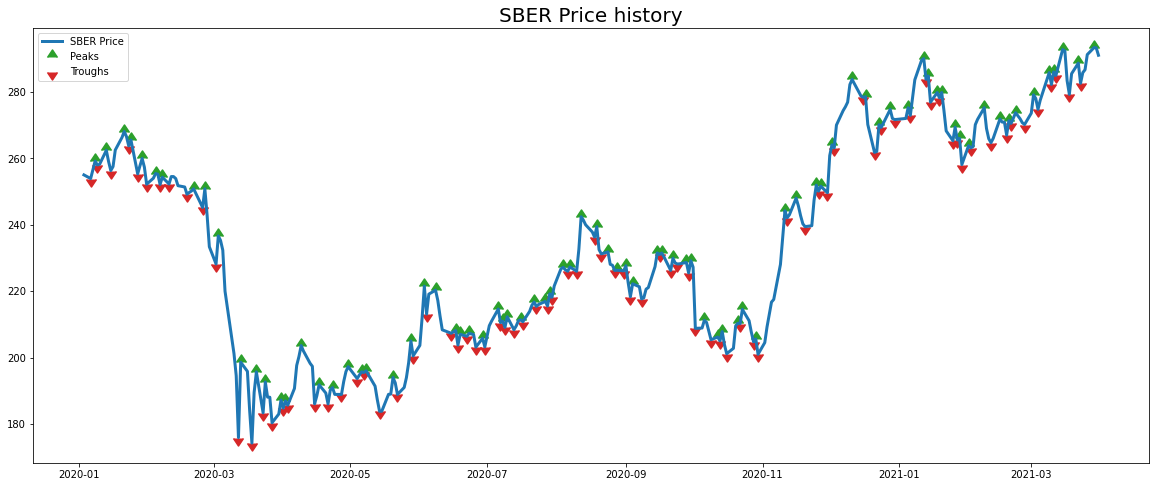

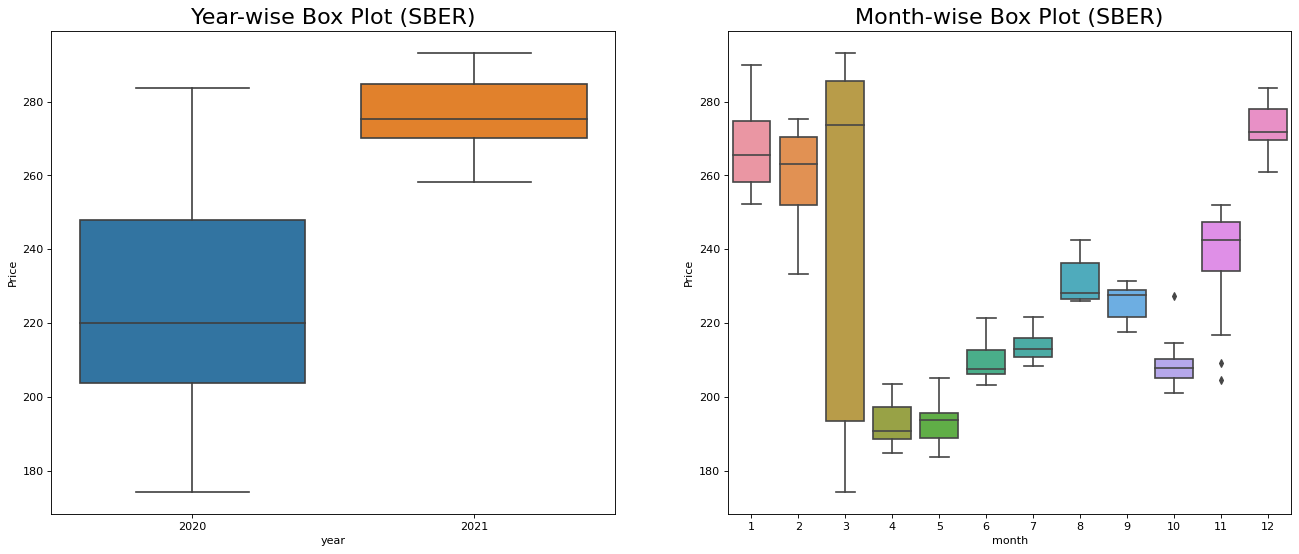

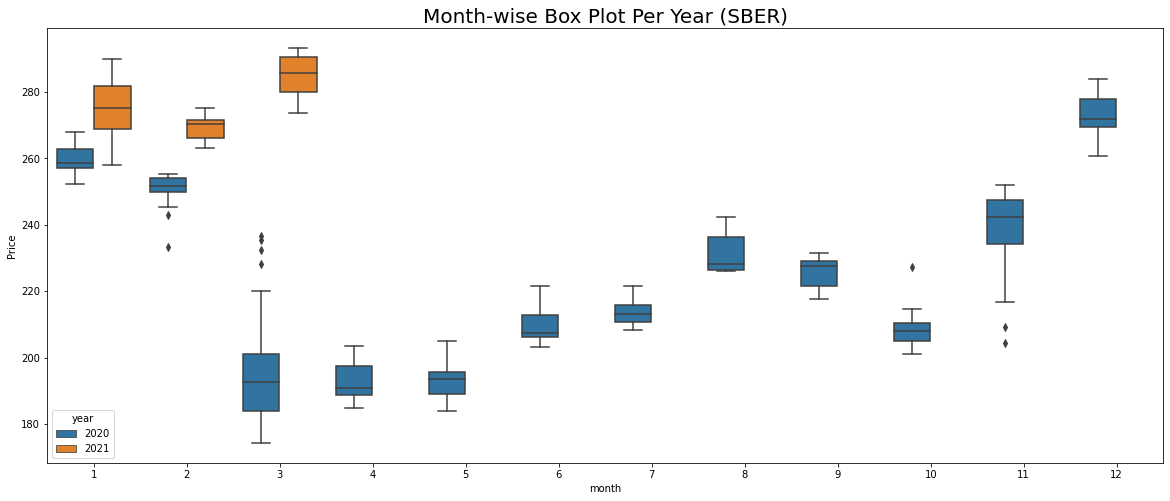

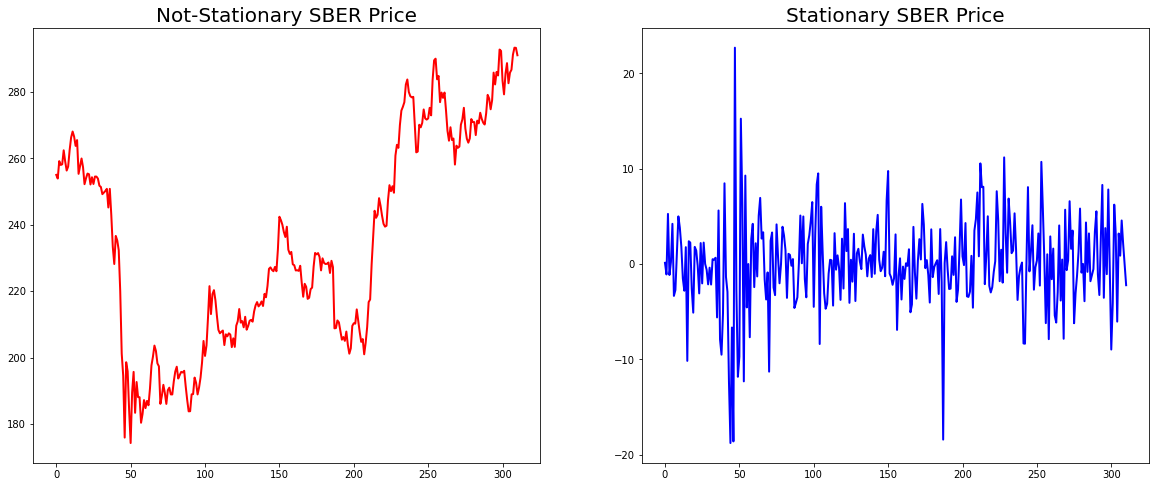

In [2]:
SBER, data_name = analysis_report('SBER', 0)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -7.79841
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       262.682   2.72685e-07       97.2417      0.4591      0.4591      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       262.682   9.11613e-09        97.638      0.5569      0.5569      160   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


2022-07-12 00:23:45.499696: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-12 00:23:45.499719: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-12 00:23:45.499737: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (amath-Latitude-7490): /proc/driver/nvidia/version does not exist
2022-07-12 00:23:45.500377: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


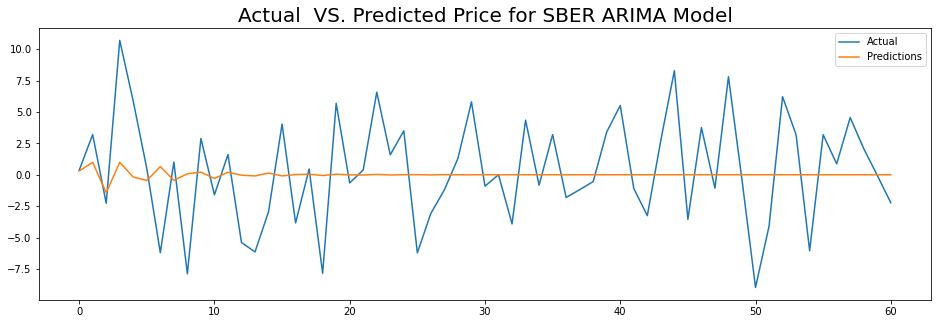

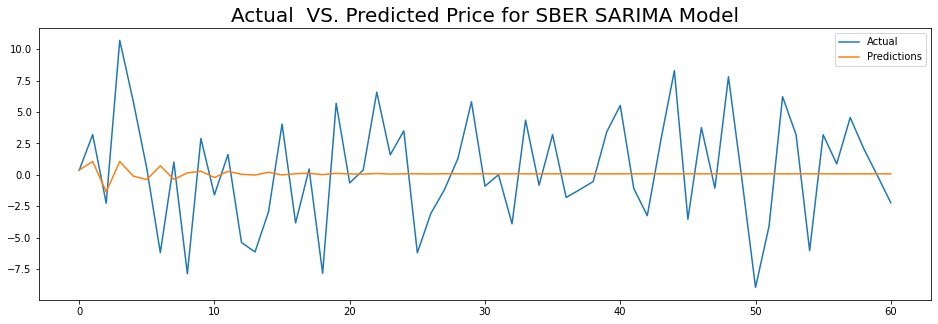

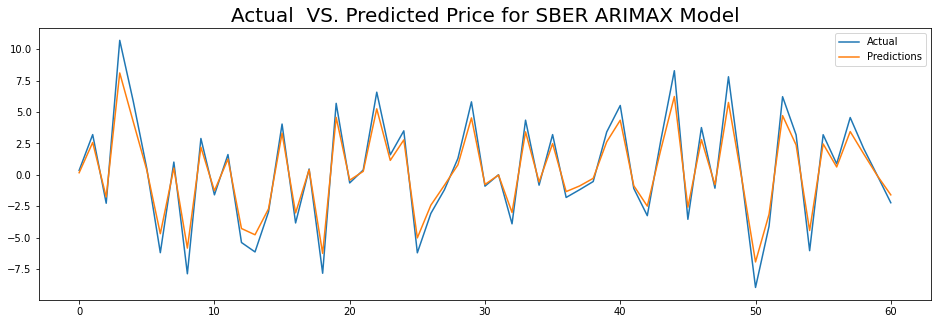

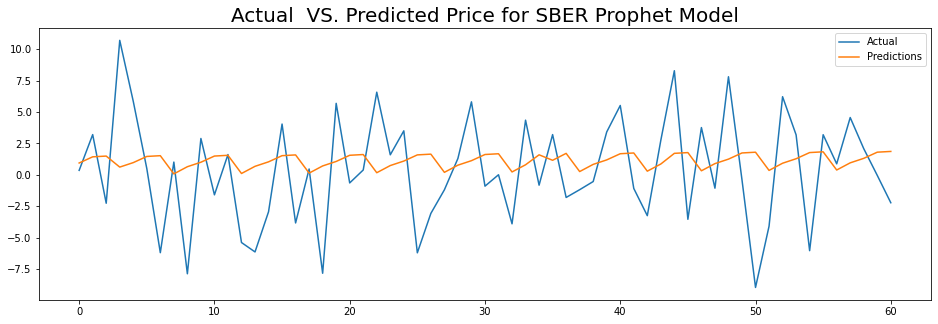

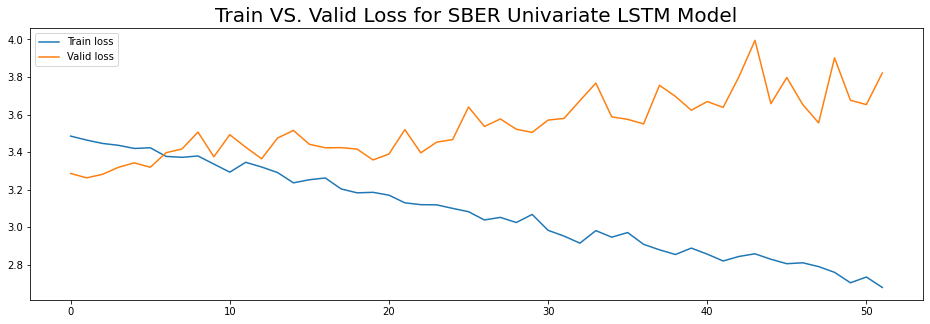

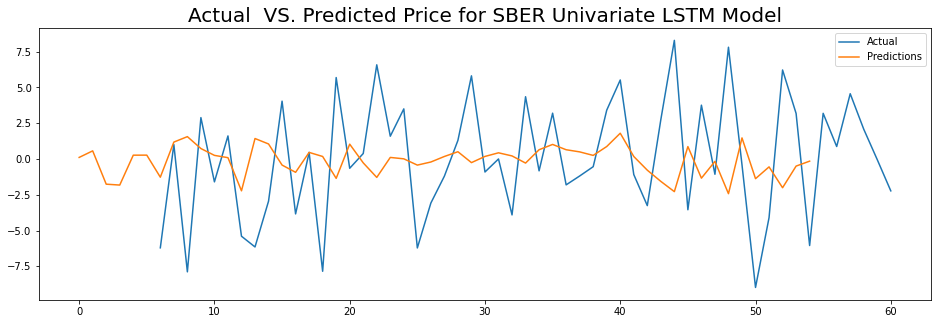

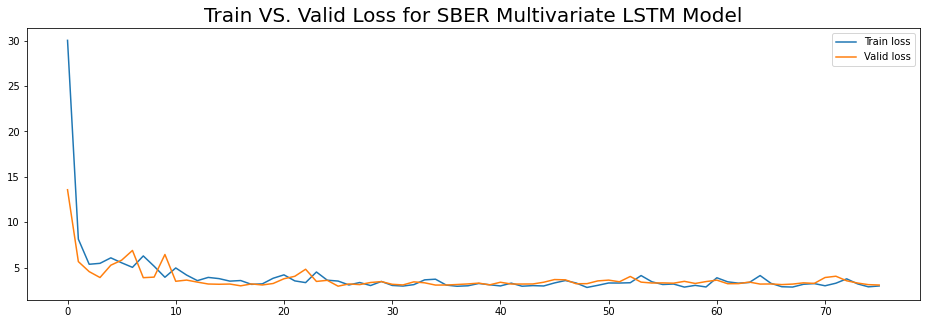

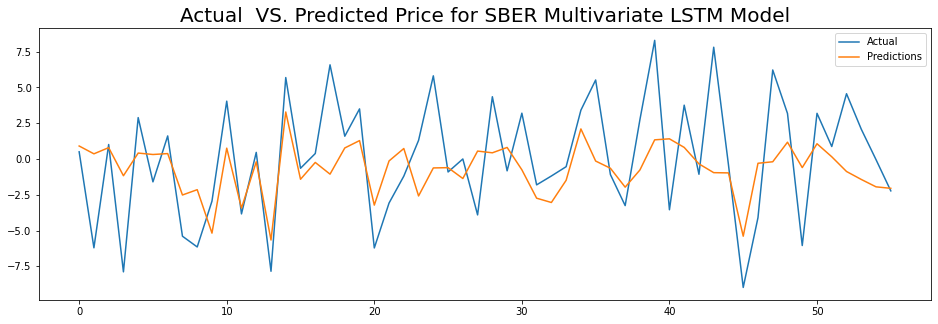

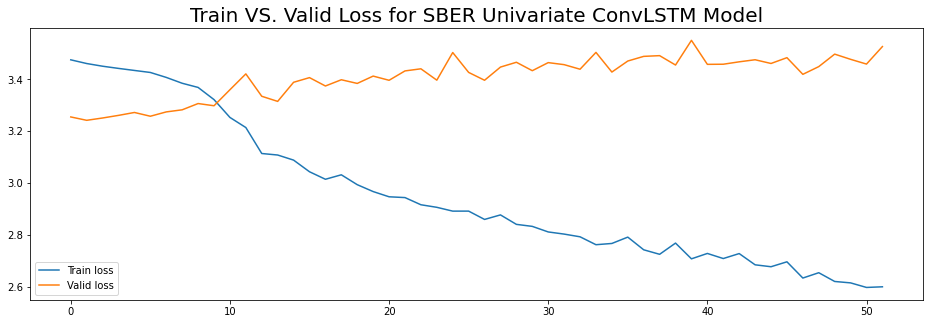

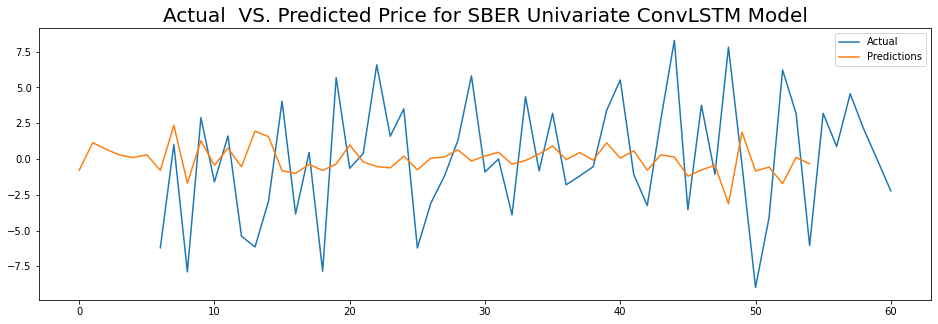

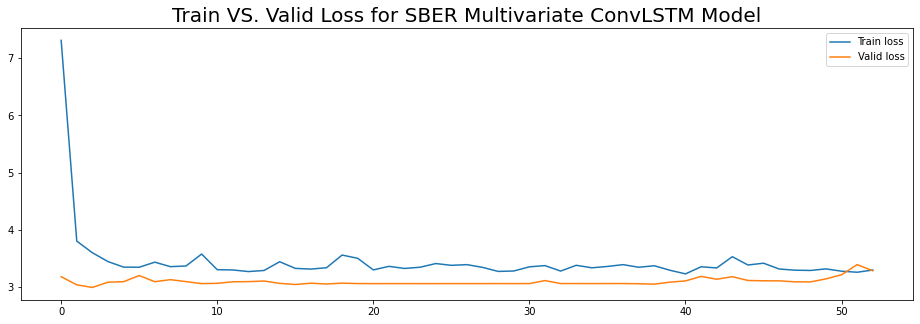

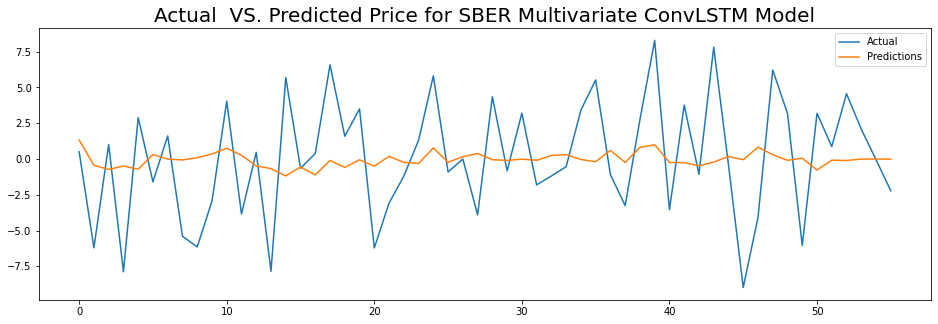

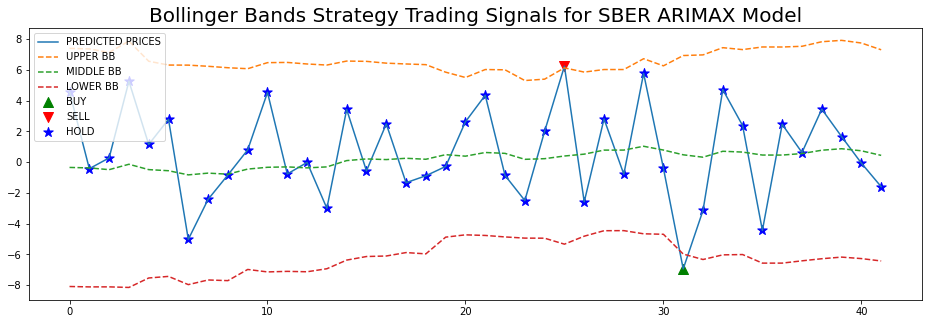

The saved percentage of money by following the model recommendations is: [45.69420035149427, -75.16703786191505]


Model  Test Score
0                  SBER ARIMA Model    3.398926
1                 SBER SARIMA Model    3.398223
2                 SBER ARIMAX Model    0.802986
3                SBER Prophet Model    3.602637
4        SBER Univariate LSTM Model    3.447710
5      SBER Multivariate LSTM Model    2.848047
6    SBER Univariate ConvLSTM Model    3.458057
7  SBER Multivariate ConvLSTM Model    3.409260

In [3]:
SBER_models_scores = models_report(SBER, data_name)
SBER_models_scores

⬜ From the price figure, we can see the end of Feb to Mar the stocks lost more than 60$ of their price but the price 
is increased again starting from the middle of May and exceed the last highest peak by around 20$.

⬜ From the box plots, we can see the price in `2021` is higher than in `2020` but we need to take into our mind that, 
the available data in 2021 is only for the first quarter so this could be changing with more data for the rest of the 
year.

⬜ The best model is `ARIMAX` with mae equal to 0.8.


⬜ The best model recommends selling with the first signal and the stockholders gained 45% of profits, and after 
a short period, it's recommended to buy to save 75% of the stock price.

**Koç Holding AS Dataset (KCHOL)**

The first 5 rows of the KCHOL data set: 

                  Date  Price   Open   High    Low    Vol.  Change %
0  2021-03-31 00:00:00  19.41  19.42  19.63  19.27  13.14M   -0.0046
1  2021-03-30 00:00:00   19.5  19.12  19.81  19.03  21.05M    0.0209
2  2021-03-29 00:00:00   19.1  19.24  19.67   19.1  16.56M   -0.0078
3  2021-03-26 00:00:00  19.25  20.28  20.36   19.1  21.35M   -0.0385
4  2021-03-25 00:00:00  20.02   20.5  20.86  20.02  15.93M   -0.0148

******************************************************************************************************************************************************
The original price values: 
The time series is not stationary and the p-value is 0.5784799525388539
The price values after difference: 
The time series is stationary and the p-value is 7.543884362997933e-11


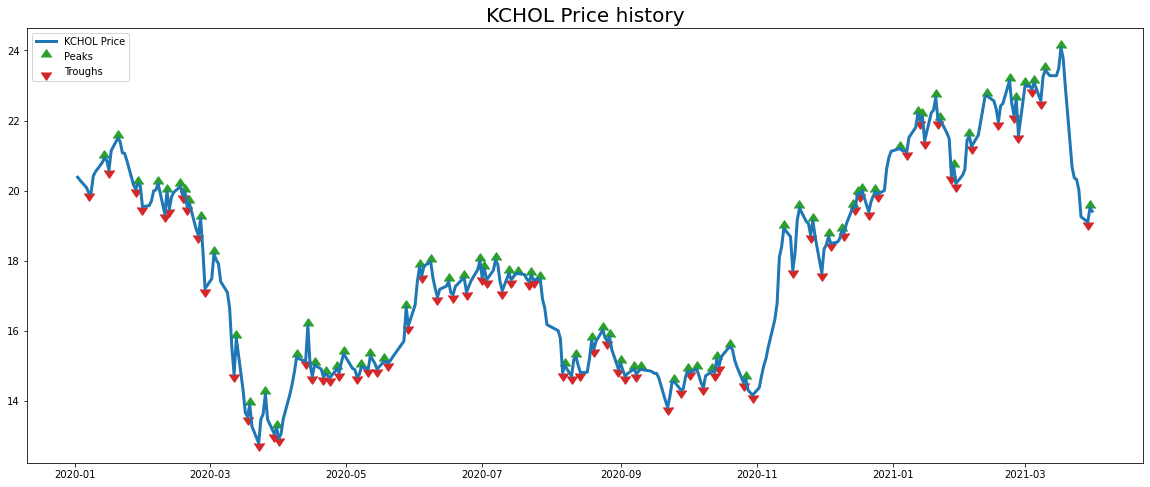

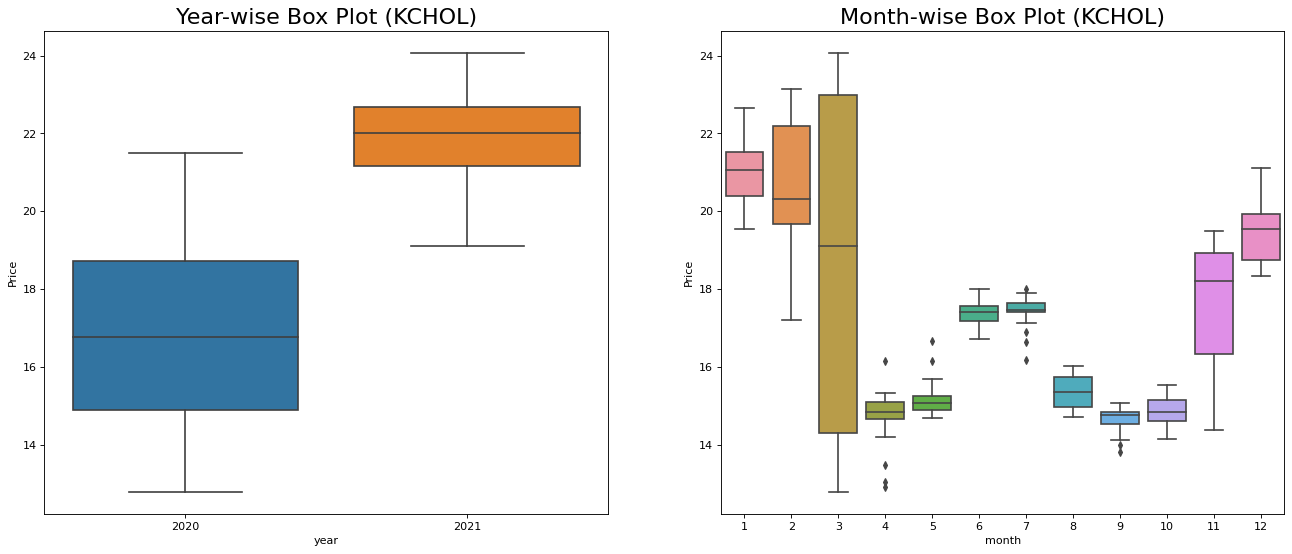

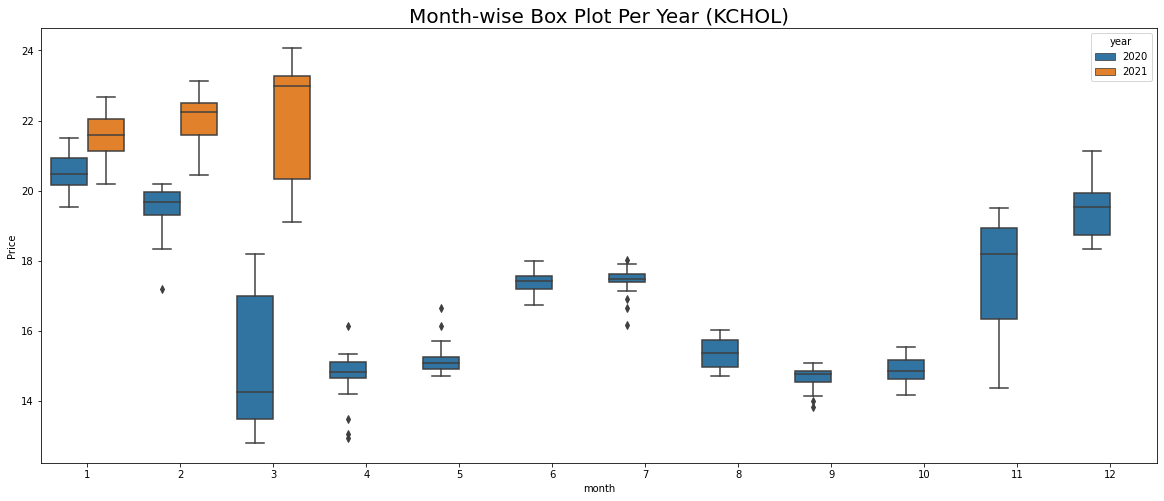

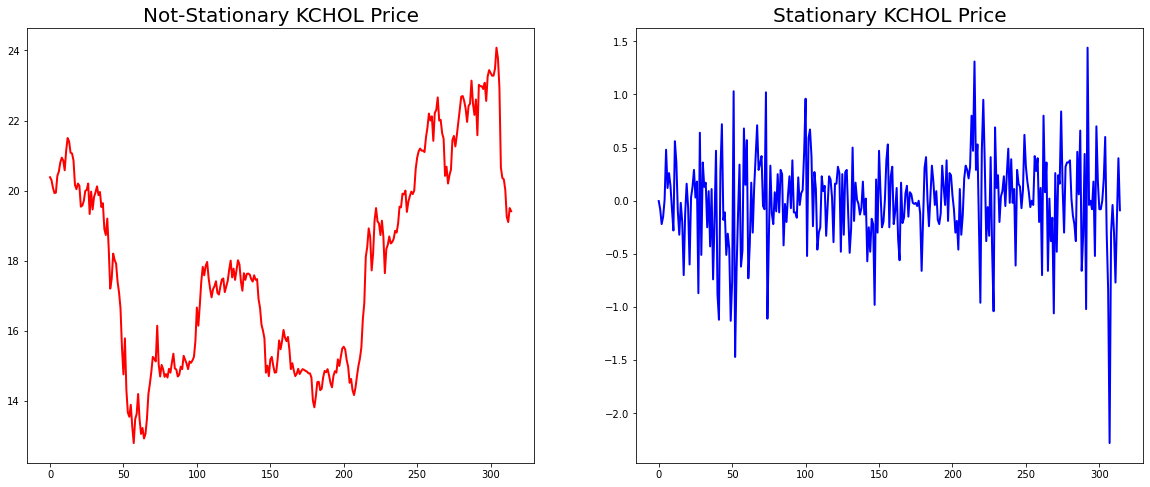

In [4]:
KCHOL, data_name = analysis_report('KCHOL', 1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -11.5045
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      59       206.985   5.94637e-09       98.9936      0.2008      0.2008       86   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


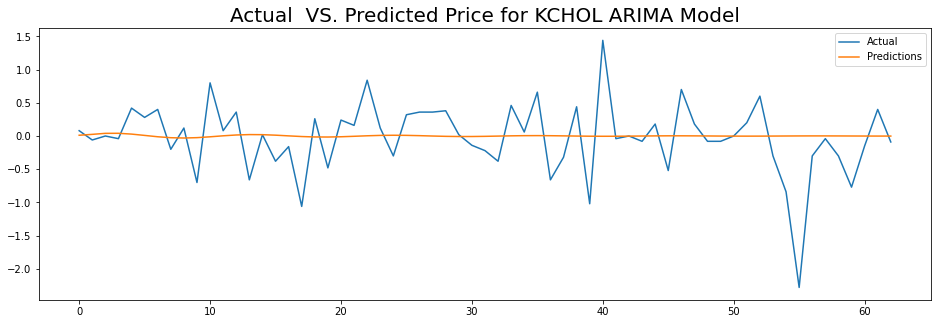

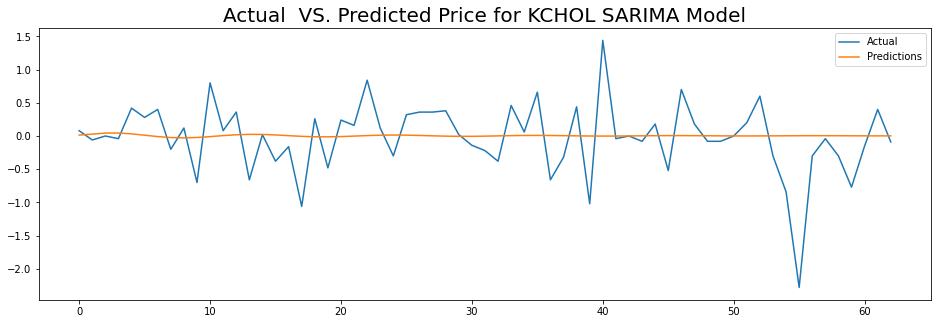

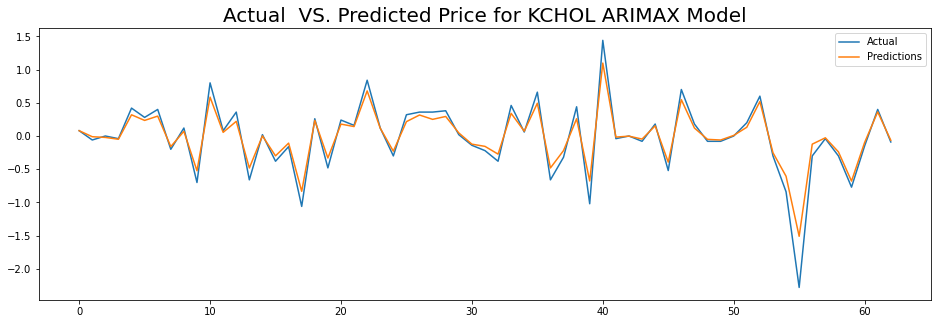

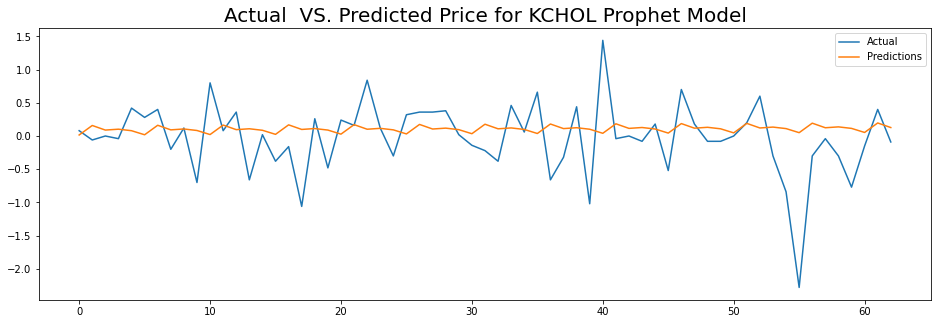

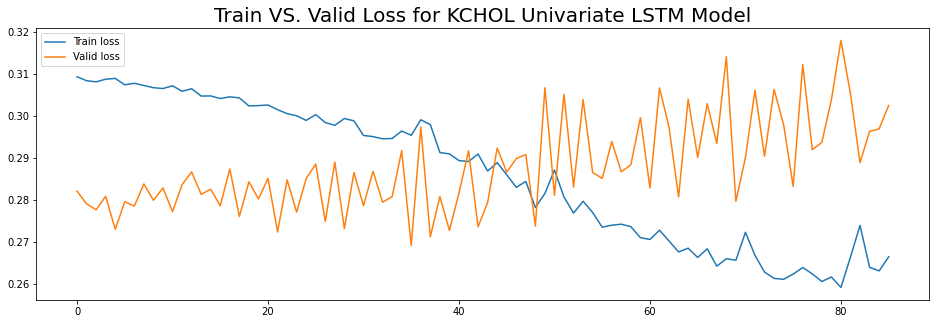

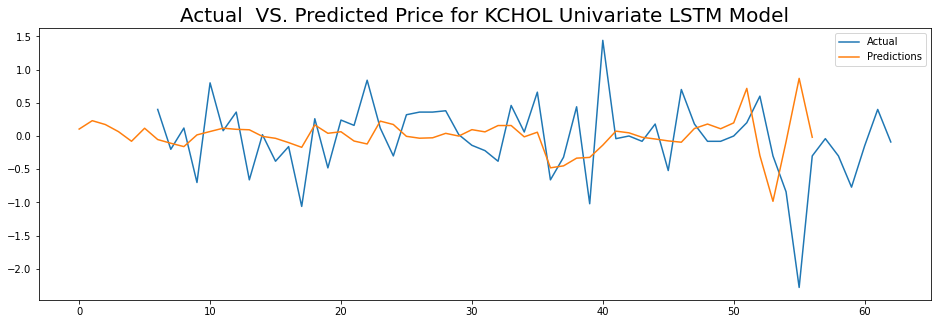

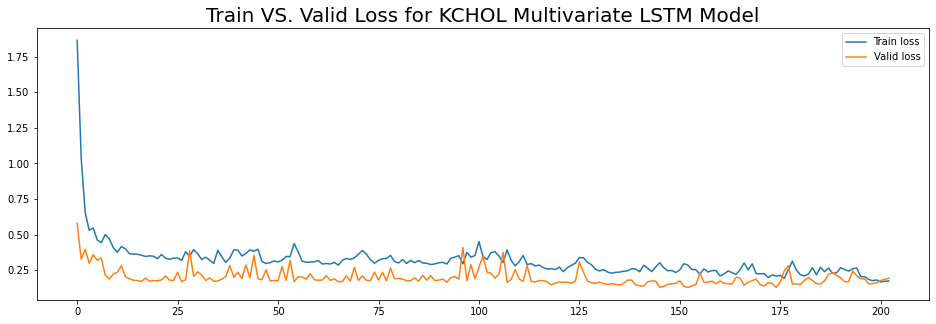

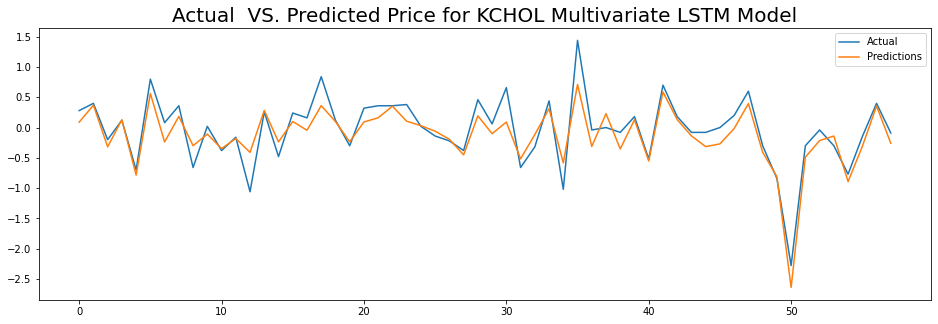

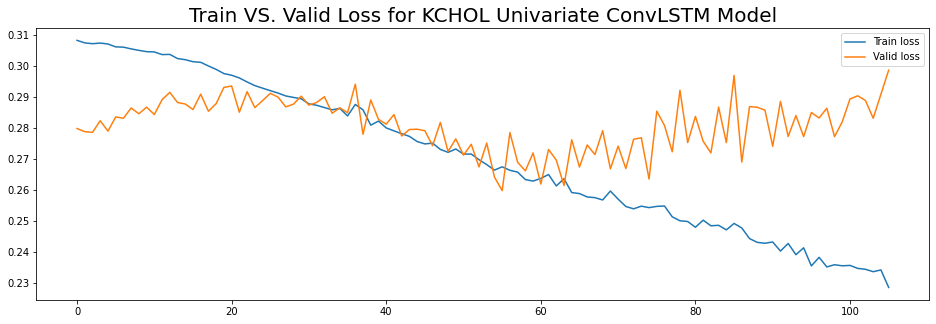

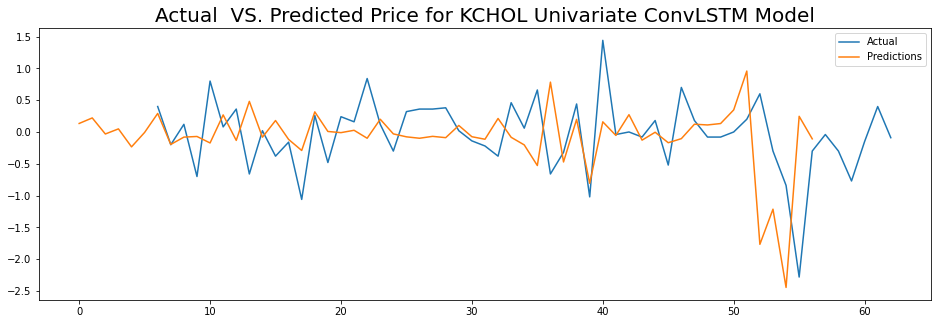

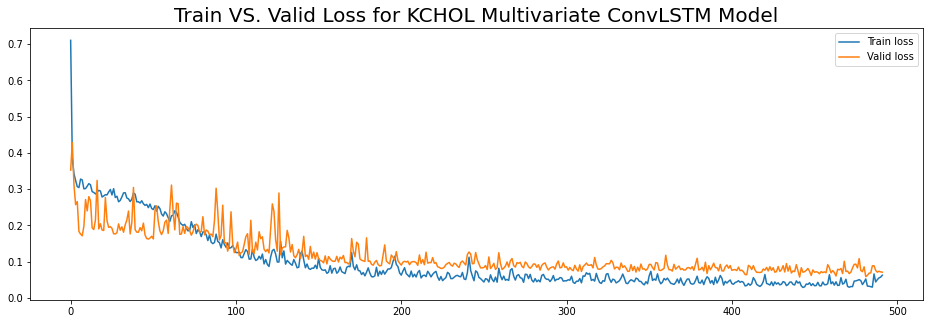

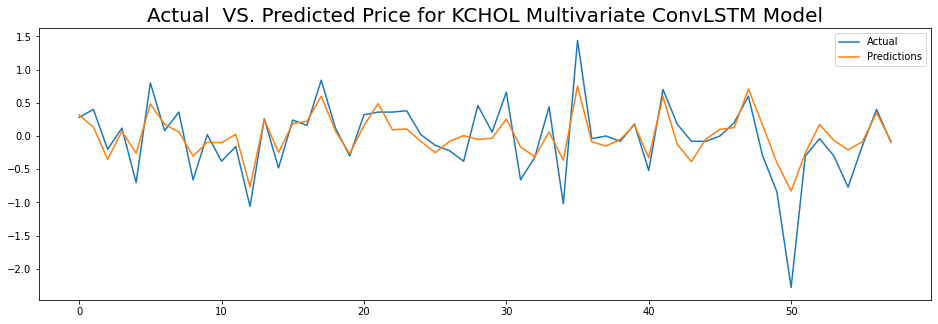

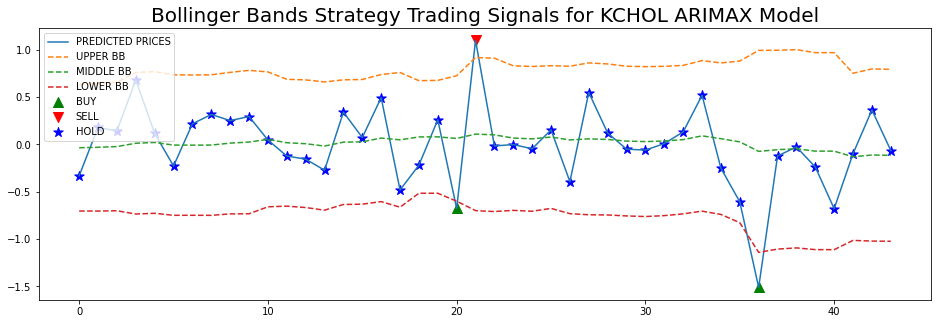

The saved percentage of money by following the model recommendations is: [112.50000000000047, -241.17647058823496, -96.05263157894738]


Model  Test Score
0                  KCHOL ARIMA Model    0.375179
1                 KCHOL SARIMA Model    0.375332
2                 KCHOL ARIMAX Model    0.097814
3                KCHOL Prophet Model    0.390865
4        KCHOL Univariate LSTM Model    0.452391
5      KCHOL Multivariate LSTM Model    0.182622
6    KCHOL Univariate ConvLSTM Model    0.521742
7  KCHOL Multivariate ConvLSTM Model    0.230327

In [5]:
KCHOL_models_scores = models_report(KCHOL, data_name)
KCHOL_models_scores

⬜ From the price figure, we can see the end of Feb to Mar the stocks lost more than 10$ of their price but the price 
is increased again starting from the middle of Apr and exceed the last highest peak by around 2$.

⬜ From the box plots, we can see the price in 2021 is higher than in 2020 but we need to take into our mind that, the 
available data in 2021 is only for the first quarter so this could be changing with more data for the rest of the year.

⬜ The best models is Arimax with mae equal to 0.09.

⬜ The best model recommends buying with the first signal with gaining the stockholders 112% of profits, and after 
a short period, it's recommended to sell because the price lost 241% of its worth. The final recommendation is to 
buy, and in this case, the holders saved 96% of the stock price.

**Madinet Nasr Housing and Development Dataset (MNHD)**

The first 5 rows of the MNHD data set: 

                  Date Price  Open  High   Low   Vol.  Change %
0  2021-03-31 00:00:00  3.75  3.74  3.82  3.71  1.57M    0.0054
1  2021-03-30 00:00:00  3.73  3.71  3.76  3.67  3.43M    0.0081
2  2021-03-29 00:00:00   3.7  3.69  3.73  3.68  1.25M   -0.0027
3  2021-03-28 00:00:00  3.71  3.76  3.76  3.68  2.34M    0.0000
4  2021-03-25 00:00:00  3.71  3.62  3.78  3.59  2.50M    0.0137

******************************************************************************************************************************************************
The original price values: 
The time series is not stationary and the p-value is 0.4307515692821572
The price values after difference: 
The time series is stationary and the p-value is 1.2158934574343581e-26


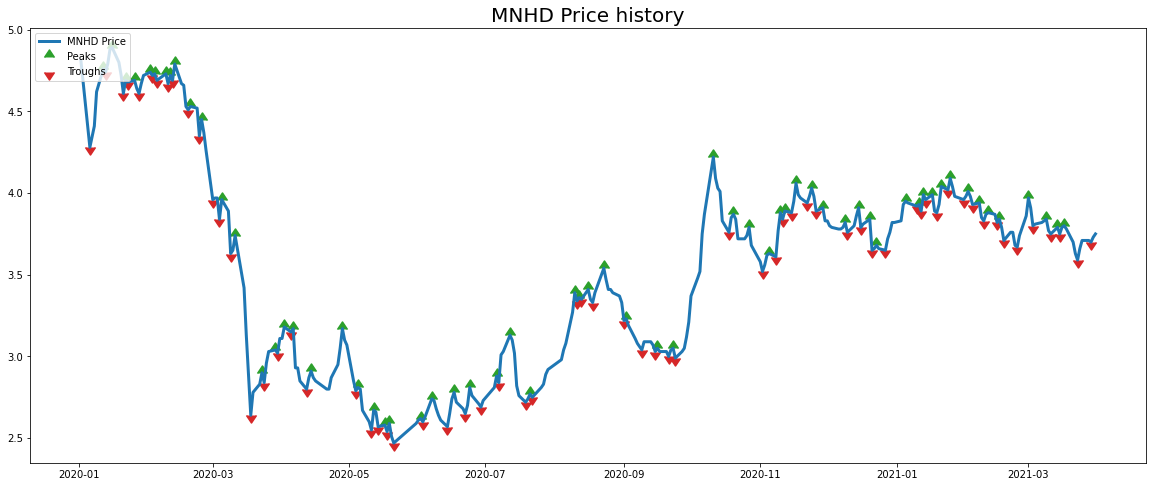

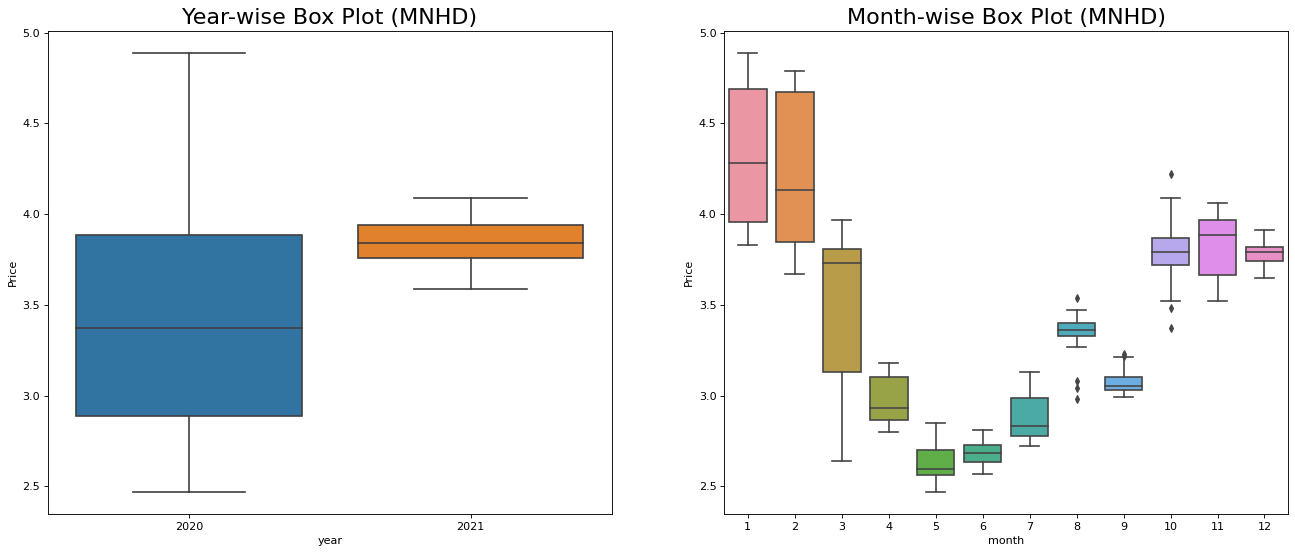

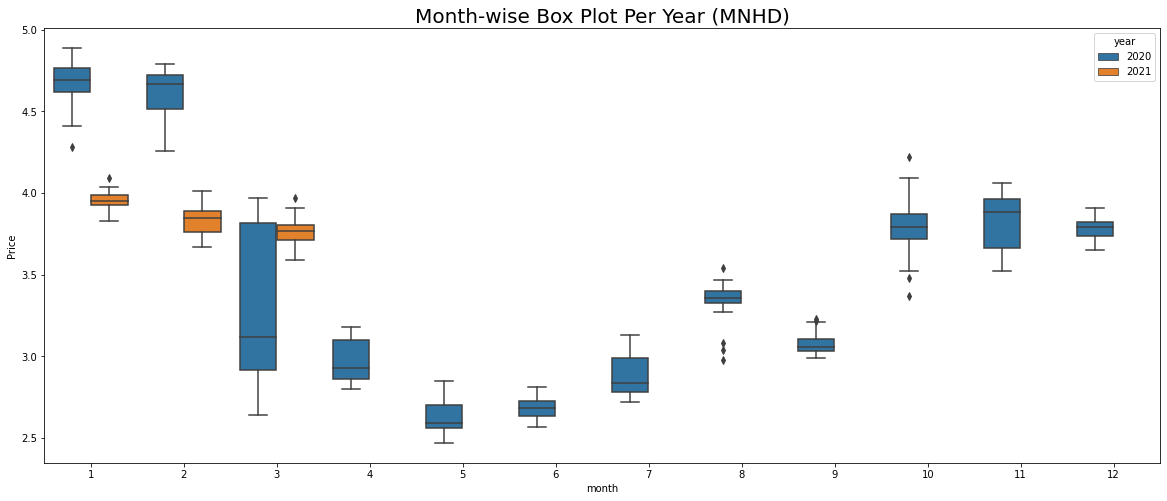

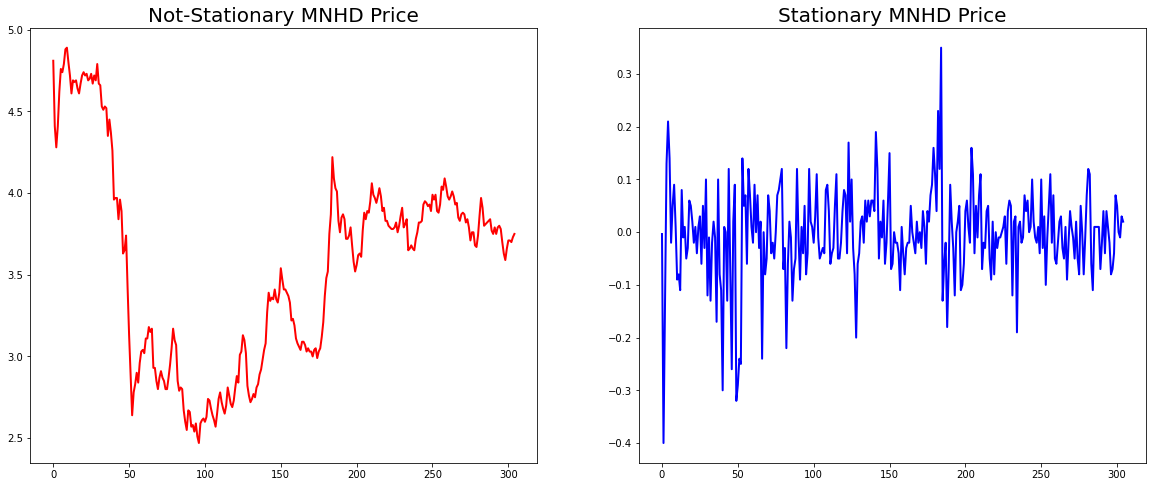

In [7]:
MNHD, data_name = analysis_report('MNHD', 2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -8.48305
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      92       237.292   6.81427e-09       100.812     0.09043     0.09043      120   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


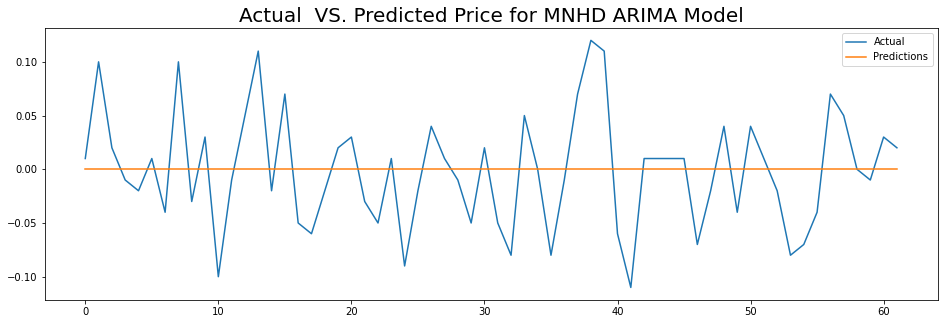

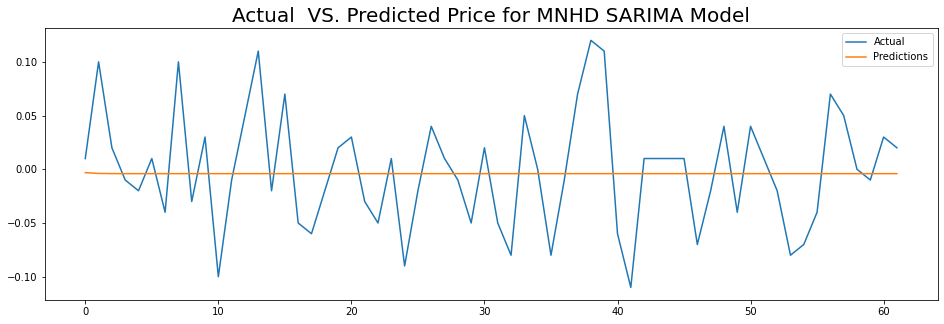

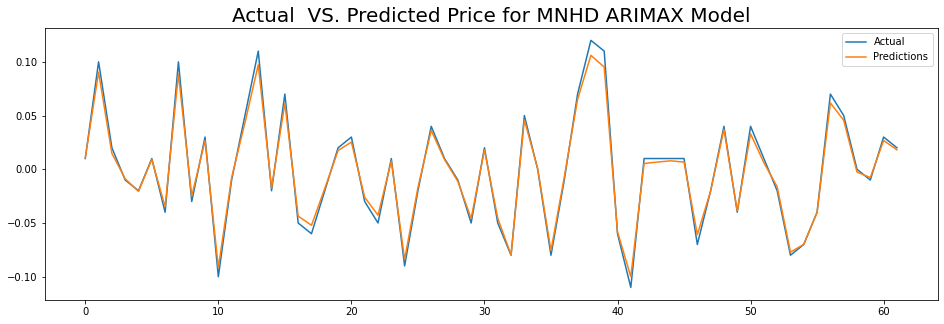

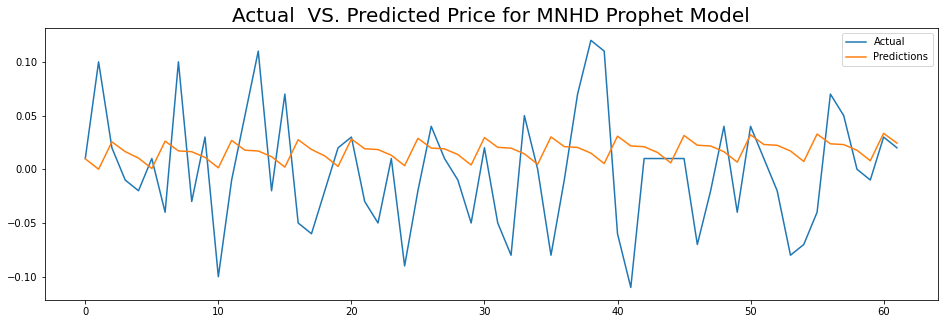

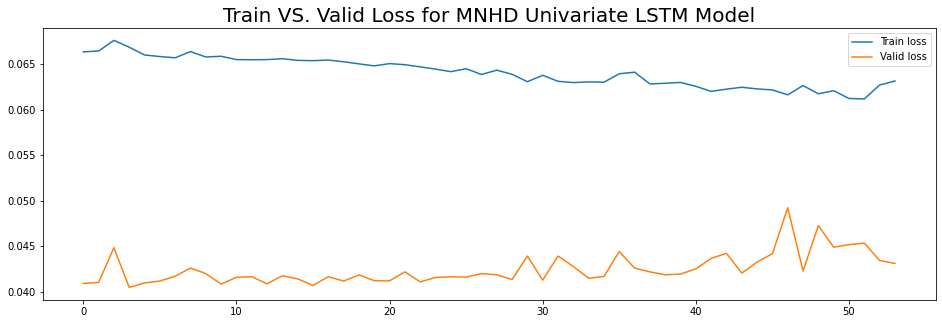

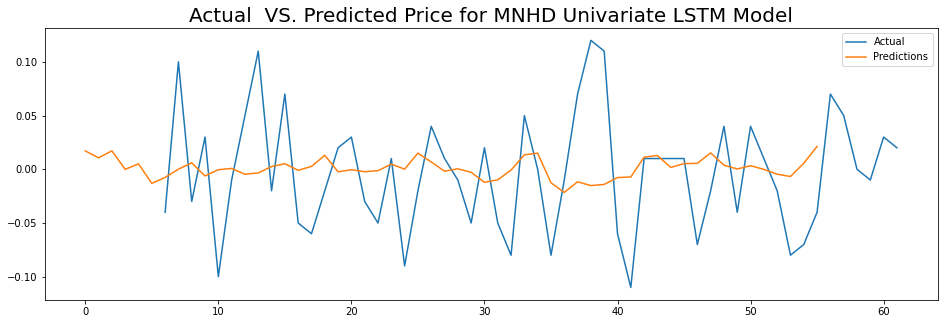

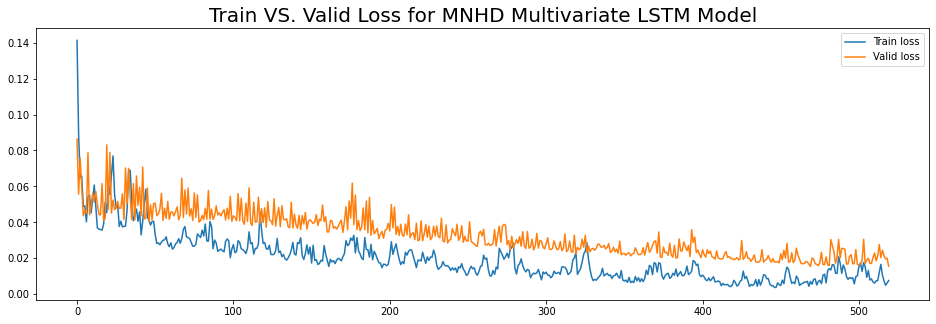

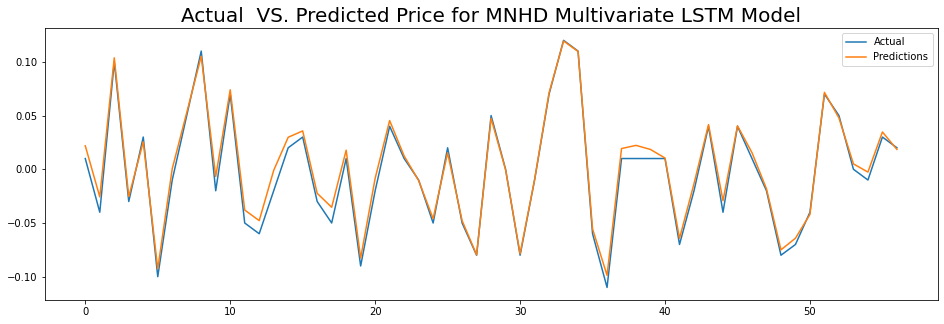

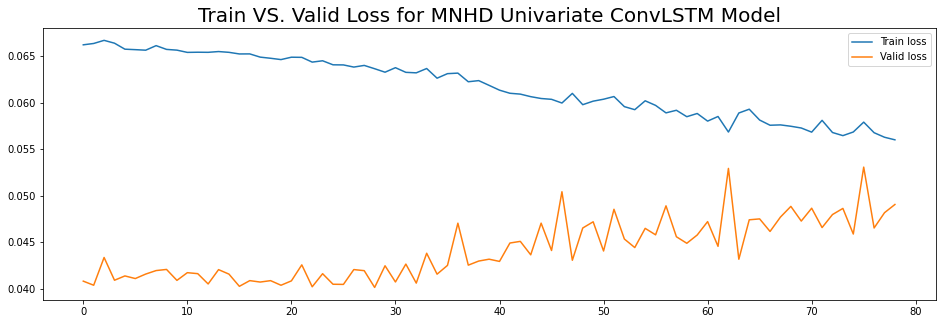

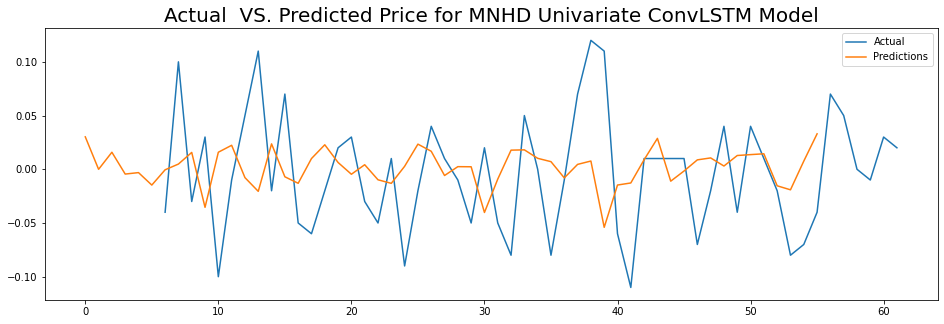

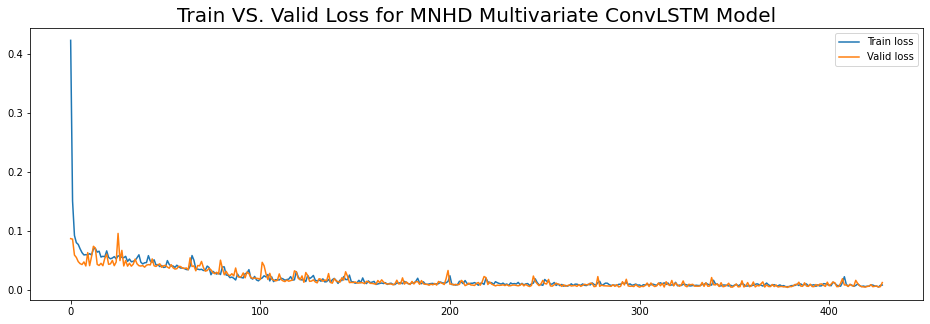

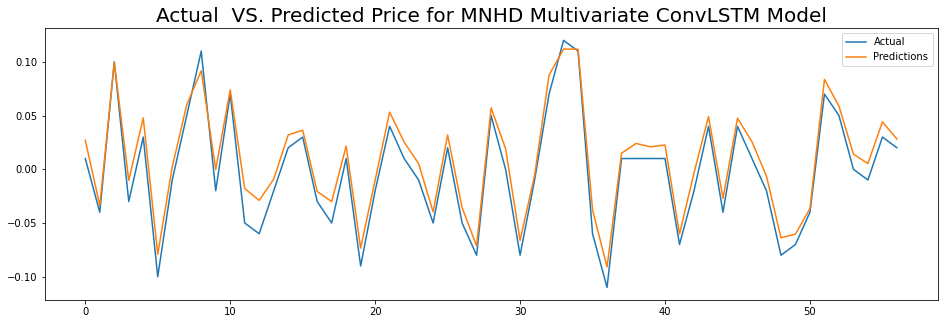

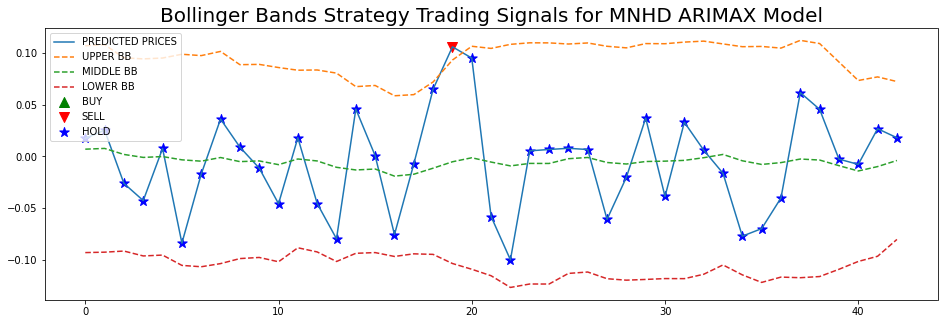

The saved percentage of money by following the model recommendations is: [-83.33333333333327]


Model  Test Score
0                  MNHD ARIMA Model    0.042419
1                 MNHD SARIMA Model    0.042531
2                 MNHD ARIMAX Model    0.004405
3                MNHD Prophet Model    0.045855
4        MNHD Univariate LSTM Model    0.045832
5      MNHD Multivariate LSTM Model    0.005782
6    MNHD Univariate ConvLSTM Model    0.047741
7  MNHD Multivariate ConvLSTM Model    0.012965

In [8]:
MNHD_models_scores = models_report(MNHD, data_name)
MNHD_models_scores

⬜ From the price figure, we can see the end of Feb to Mar the stocks lost more than 10$ of their price but the price 
is increased again starting from the middle of May and the price still is lower than the last highest peak by around 
1$.

⬜ From the box plots, we can see the price in 2021 is lower than in 2020 but we need to take into our mind that, the 
available data in 2021 is only for the first quarter so this could be changing with more data for the rest of the year.

⬜ The best models is Multivariate LSTM  with mae equal to 0.042.

⬜ The best model recommends selling, and as we can see the stock price got down with 83% of the stock worth.

**Minerva SA/Brazil Dataset (BEEF3)**

The first 5 rows of the BEEF3 data set: 

                  Date  Price   Open   High    Low    Vol.  Change %
0  2021-03-31 00:00:00   10.2  10.35   10.4  10.12   7.77M   -0.0154
1  2021-03-30 00:00:00  10.36  10.41  10.62   10.3   9.93M   -0.0105
2  2021-03-29 00:00:00  10.47   9.85   10.5   9.81  22.04M    0.0651
3  2021-03-26 00:00:00   9.83    9.8   9.94    9.7   5.11M    0.0031
4  2021-03-25 00:00:00    9.8  10.01  10.01   9.66   8.88M   -0.0151

******************************************************************************************************************************************************
The original price values: 
The time series is not stationary and the p-value is 0.18390623701557424
The price values after difference: 
The time series is stationary and the p-value is 6.858473426850698e-13


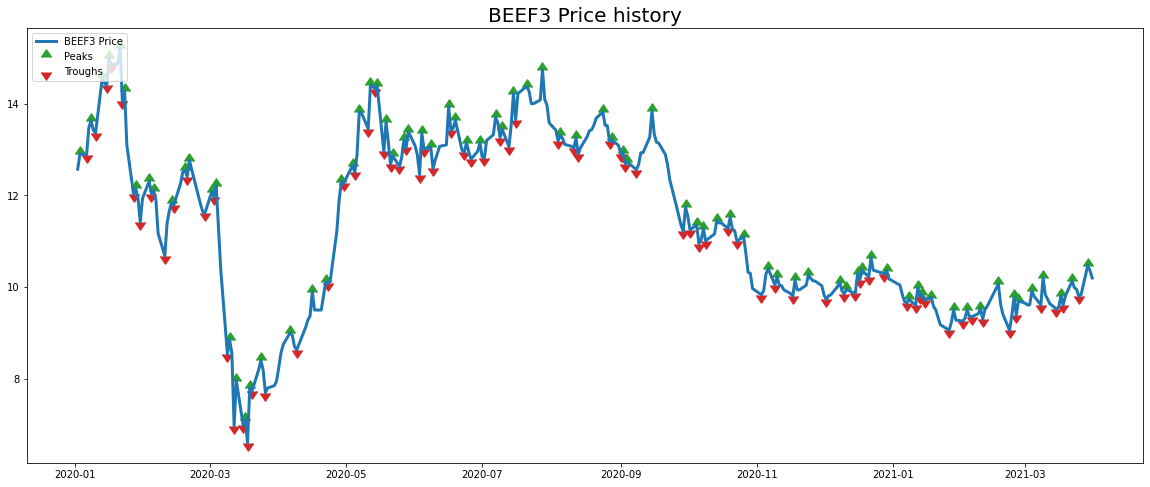

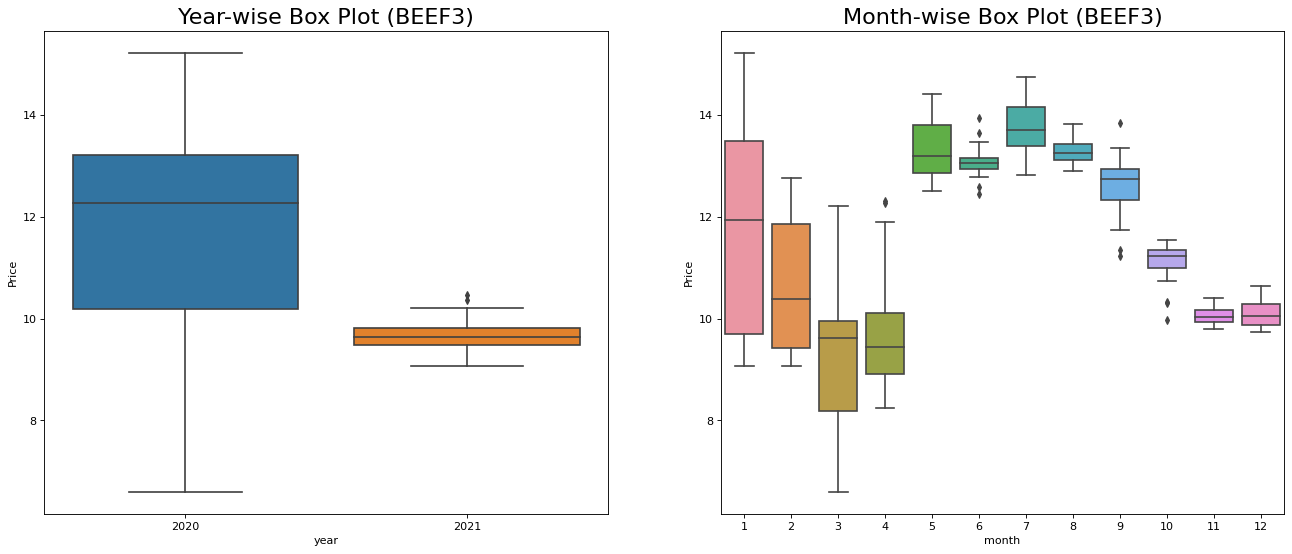

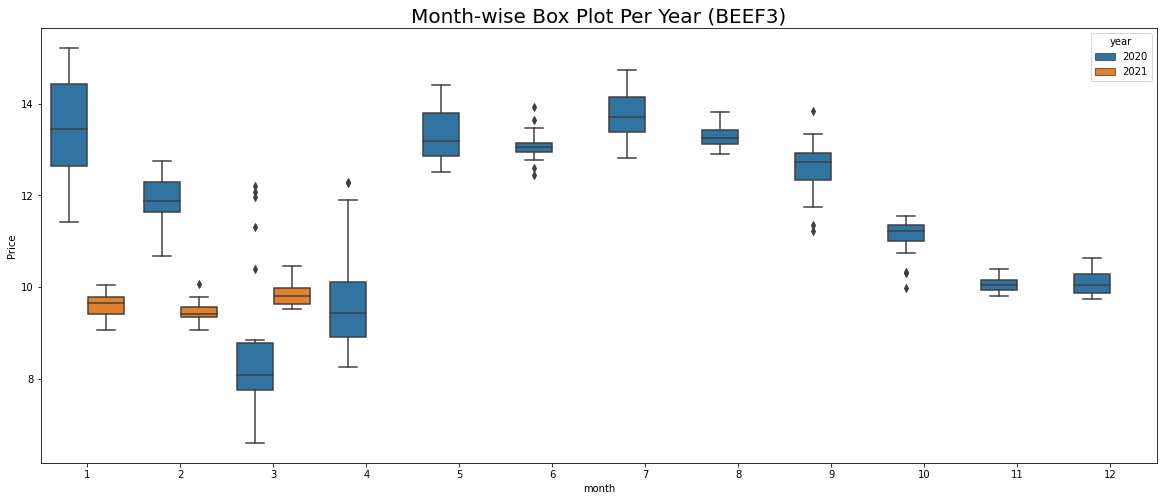

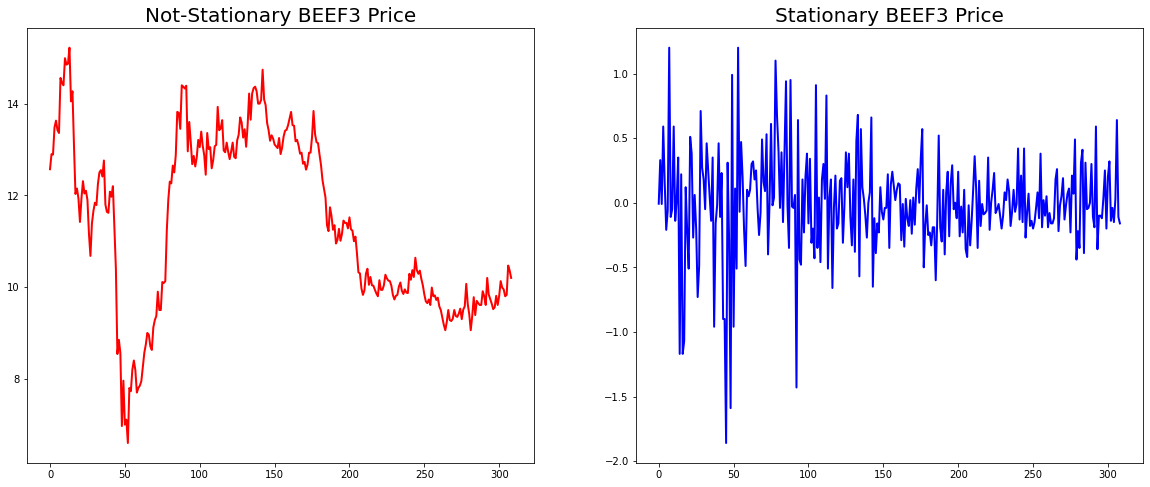

In [9]:
BEEF3, data_name = analysis_report('BEEF3', 3)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -8.45093
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       253.853   0.000396434       99.1744           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     162       253.867   9.06196e-09       94.4807      0.3318      0.3318      198   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


UnboundLocalError: local variable 'bb_predictions' referenced before assignment

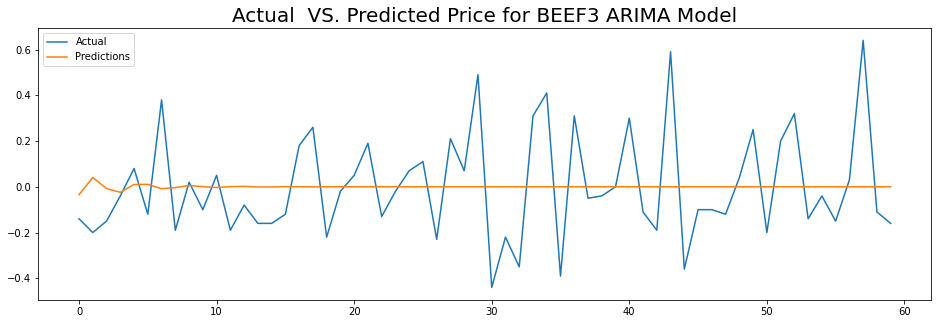

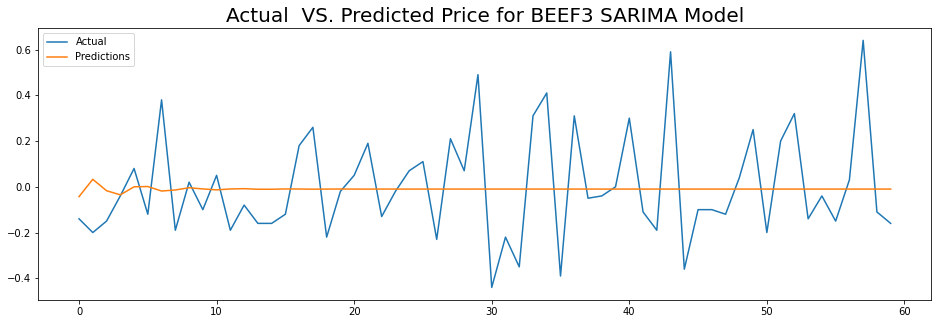

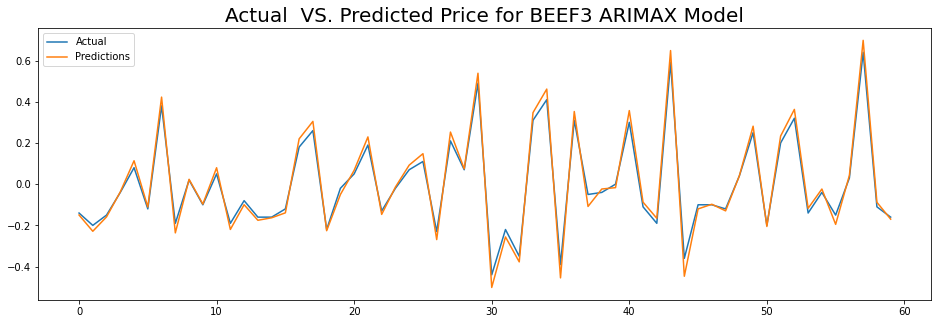

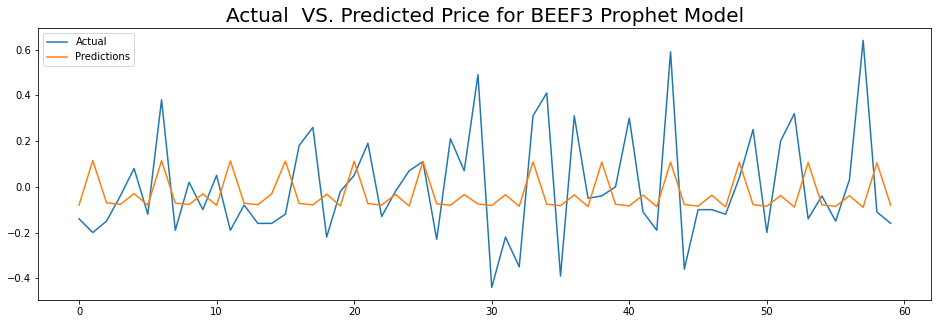

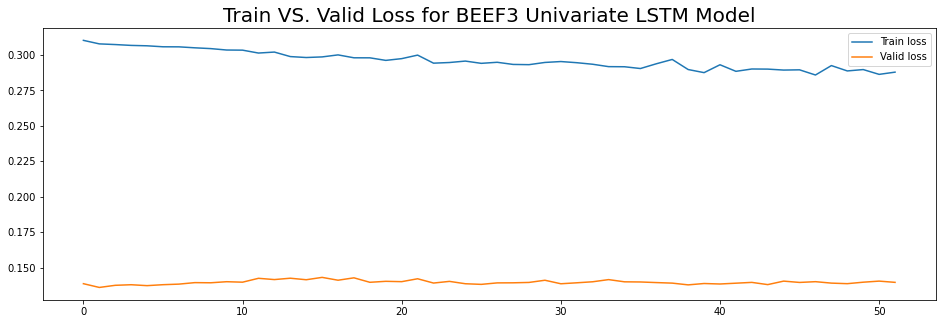

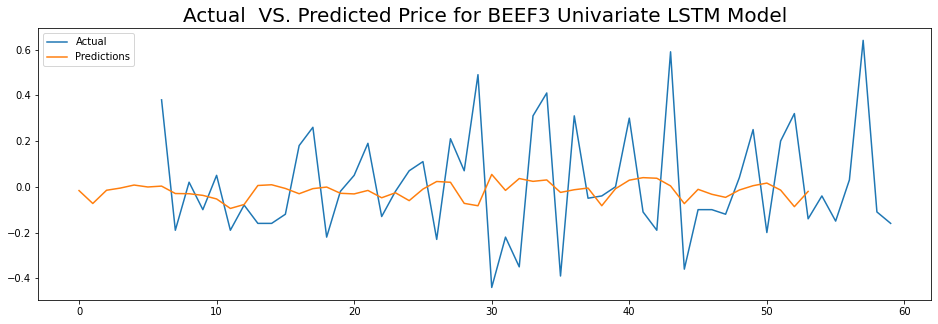

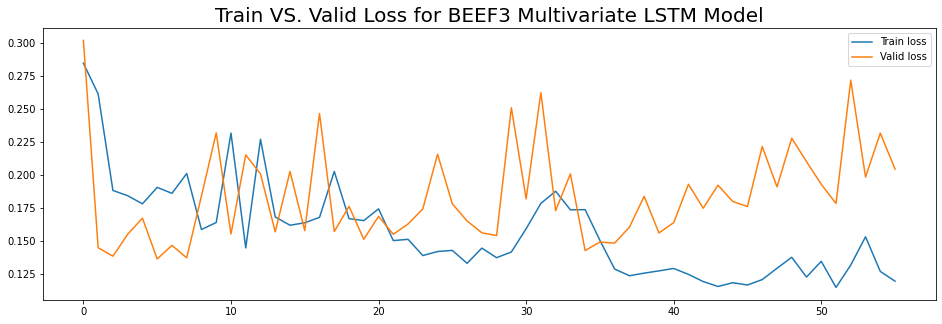

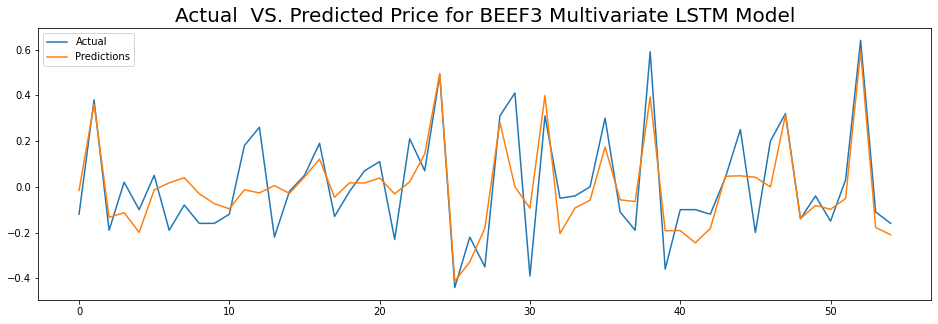

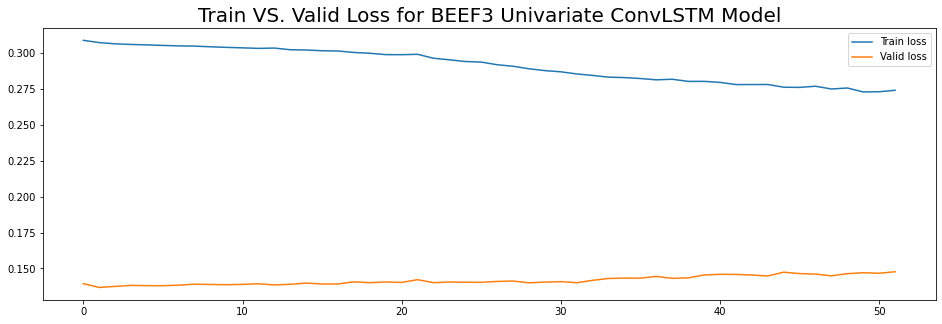

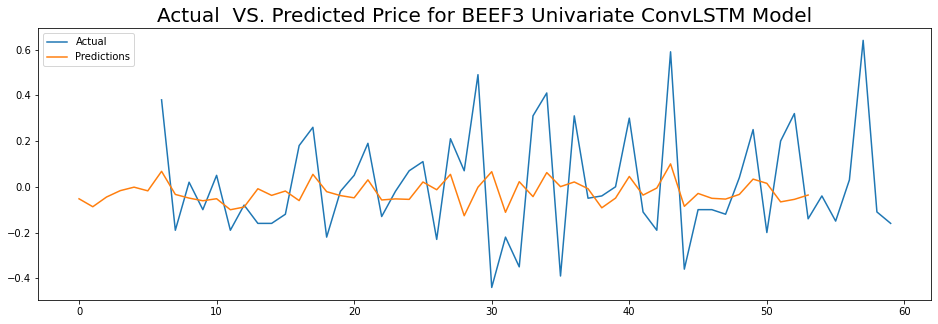

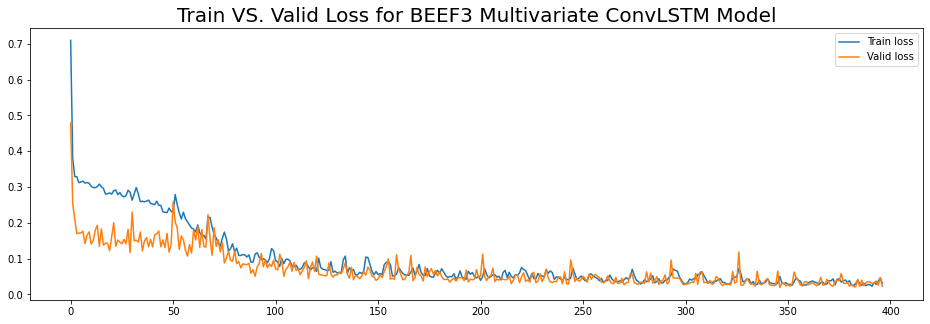

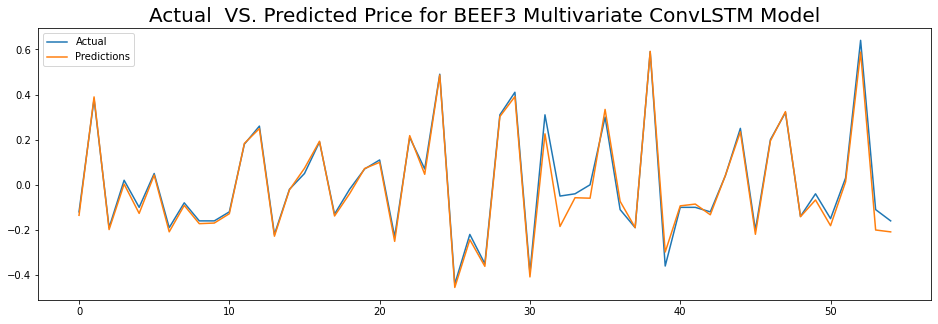

In [10]:
BEEF3_models_scores = models_report(BEEF3, data_name)
BEEF3_models_scores

⬜ From the price figure, we can see the end of Jan to the early of Mar the stocks lost more than 50% of their price 
but the price is increased again starting from the middle of Mar to Oct and dropped again. 

⬜ From the box plots, we can see the price in 2021 is lower than in 2020 but we need to take into our mind that, 
the available data in 2021 is only for the first quarter so this could be changing with more data for the rest of the 
year.

⬜ The best models is ARIMAX  with mae equal to 0.028.

⬜ The best model recommends selling as a first signal, which saved 2550% of the loss. And then, it's recommended to
buy to active 189% of profits. The final signal is to sell, and by following this, the holders can be saved 125% of 
the loss.

**Pampa Energia SA Dataset (PAMP)**

The first 5 rows of the PAMP data set: 

                  Date  Price   Open   High    Low     Vol.  Change %
0  2021-03-31 00:00:00  85.15   86.5   88.1  85.15  564.30K   -0.0110
1  2021-03-30 00:00:00   86.1  85.15  86.75   84.6  141.40K    0.0129
2  2021-03-29 00:00:00   85.0   80.0   86.0   79.0  371.22K    0.0385
3  2021-03-26 00:00:00  81.85   84.0   84.6   80.7  462.55K   -0.0209
4  2021-03-25 00:00:00   83.6   85.2   87.3   82.1  389.78K   -0.0313

******************************************************************************************************************************************************
The original price values: 
The time series is not stationary and the p-value is 0.8357469289607862
The price values after difference: 
The time series is stationary and the p-value is 2.2378052806172923e-30


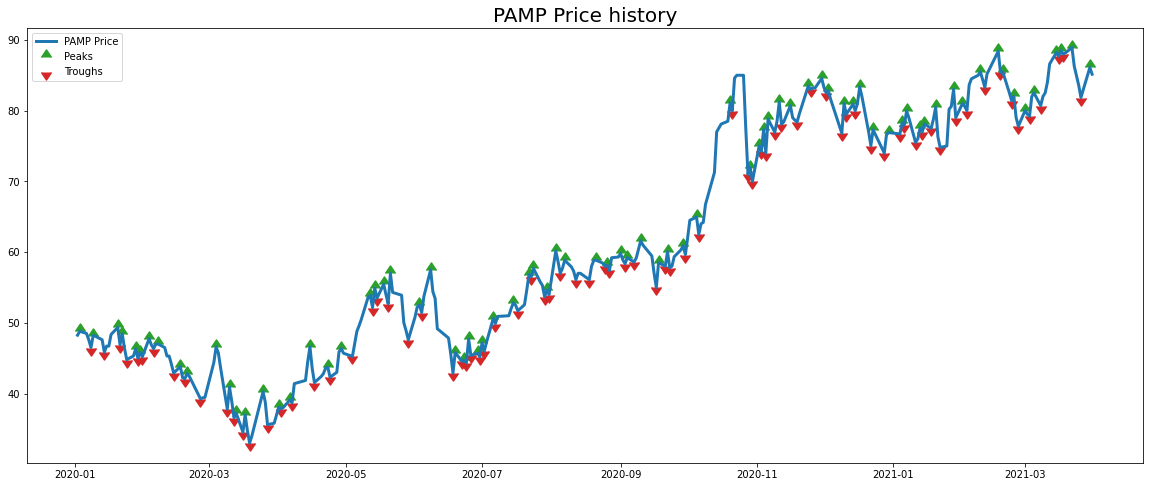

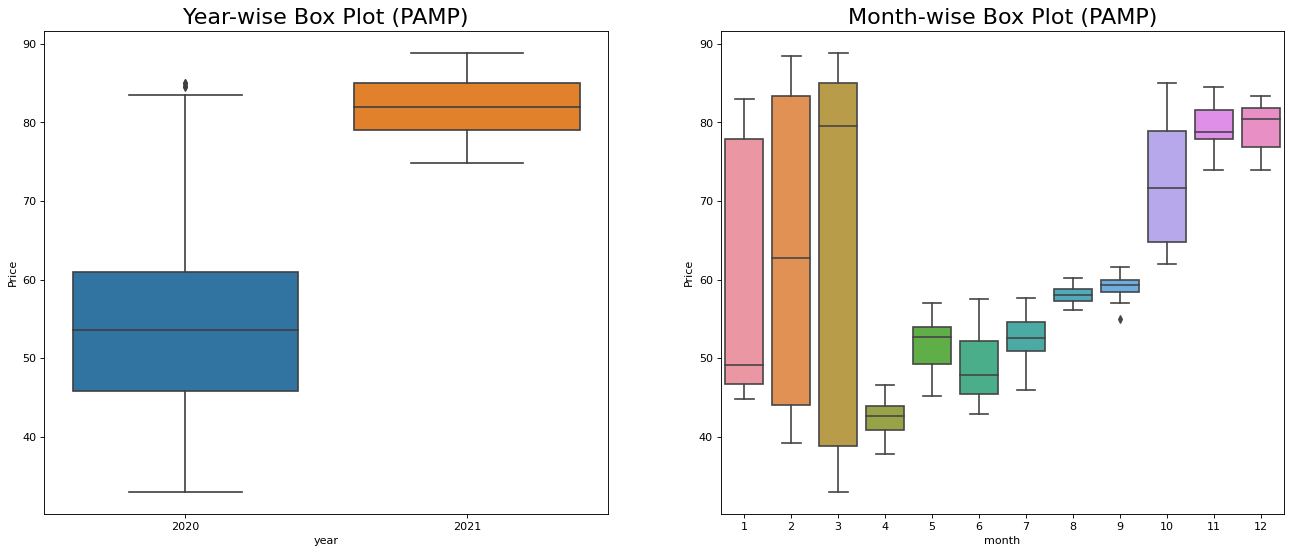

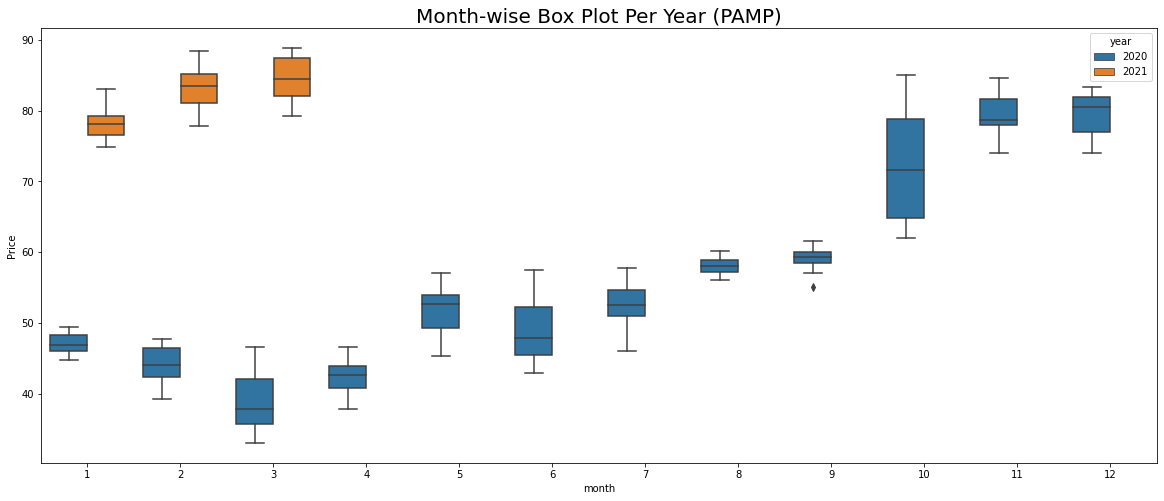

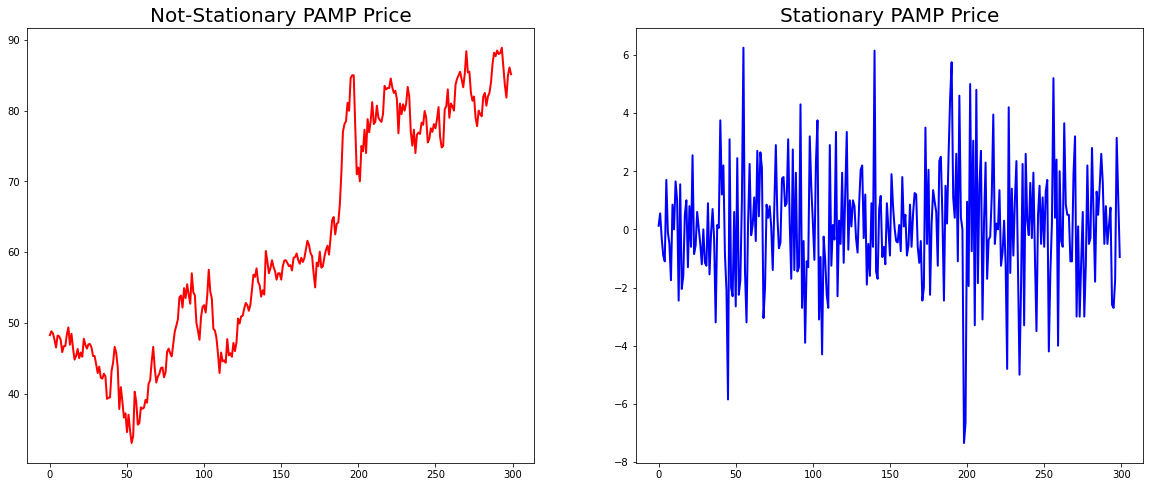

In [11]:
PAMP, data_name = analysis_report('PAMP', 4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -11.5158
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      69       184.921   5.24935e-09       103.216      0.5106      0.5106       88   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


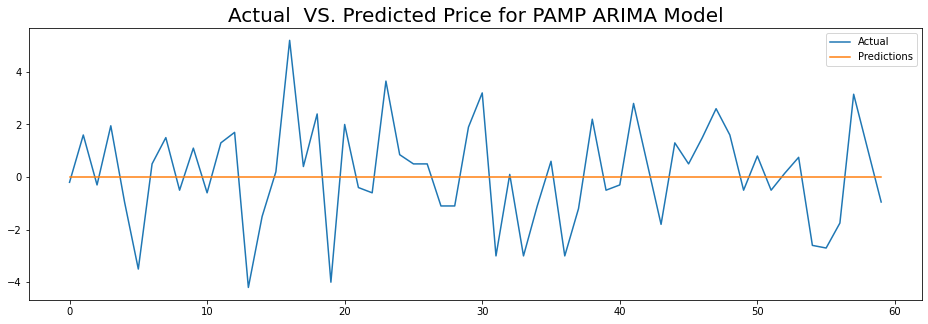

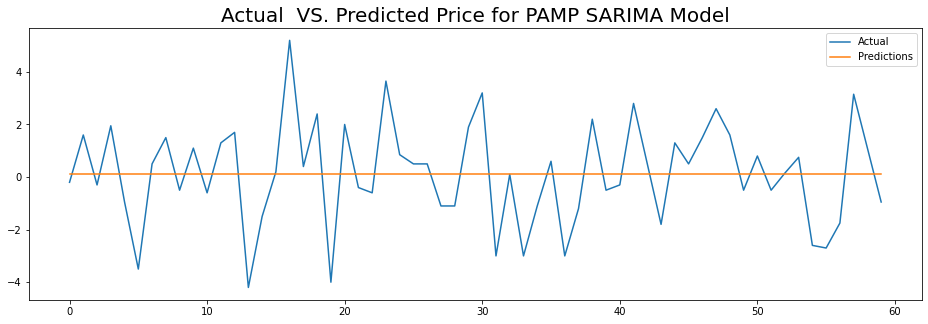

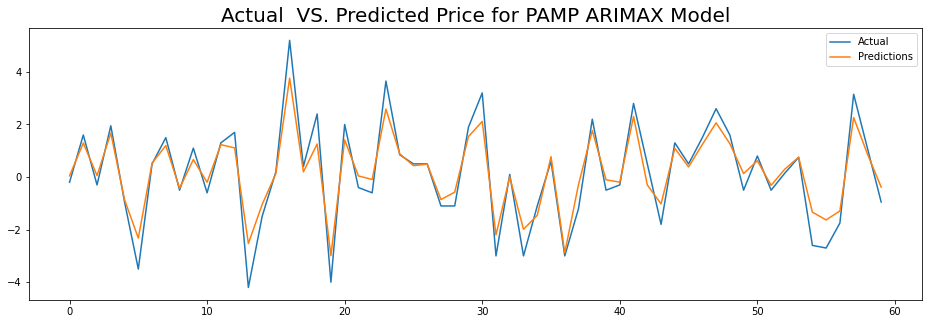

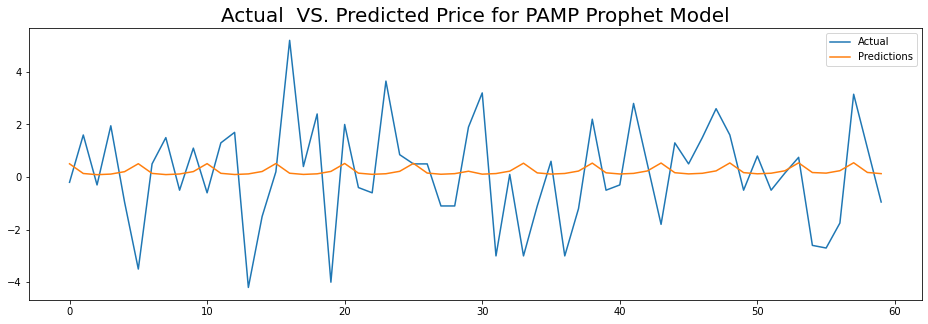

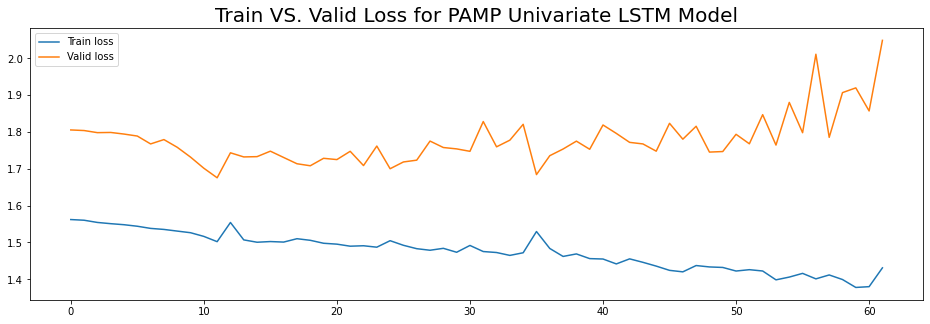

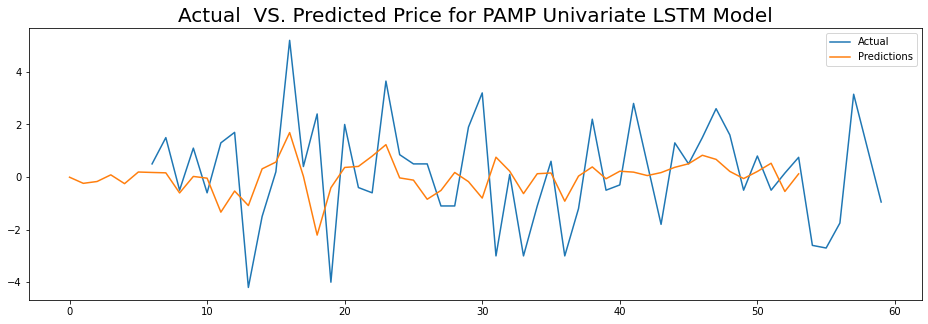

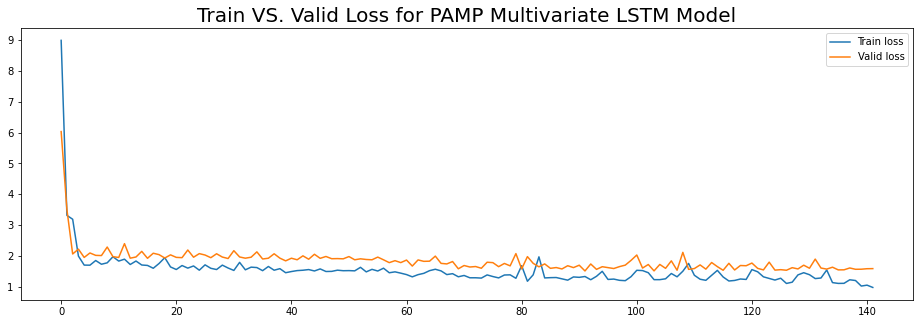

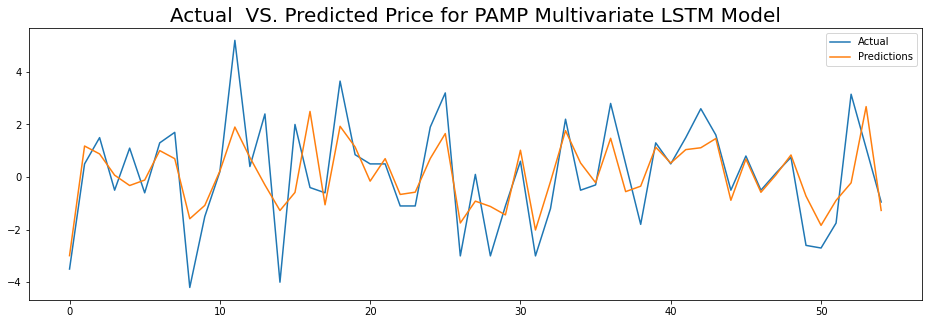

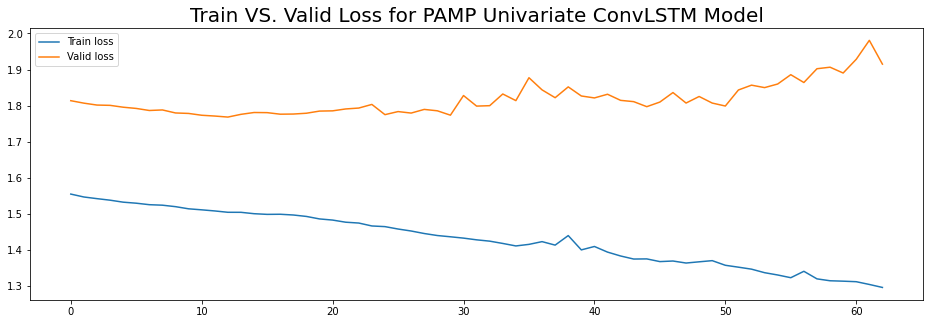

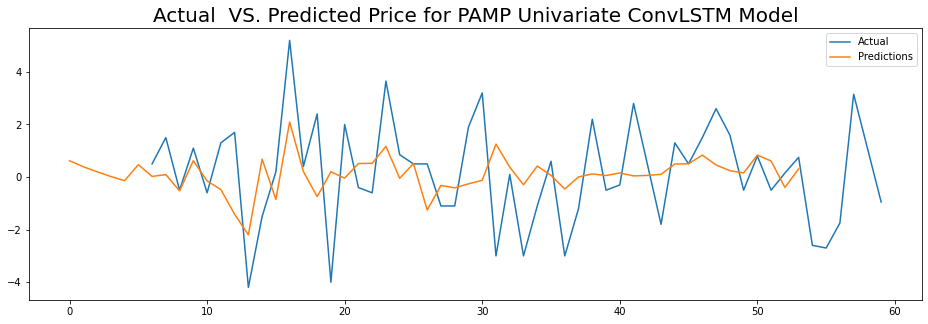

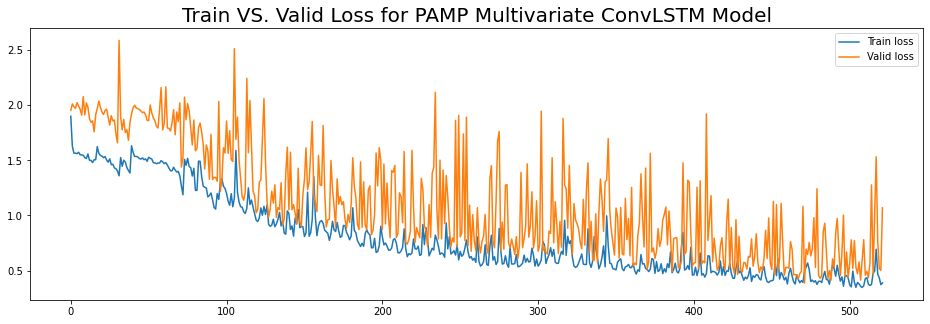

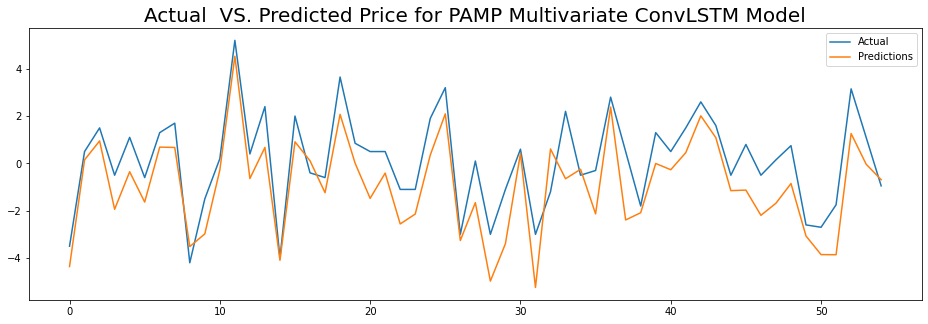

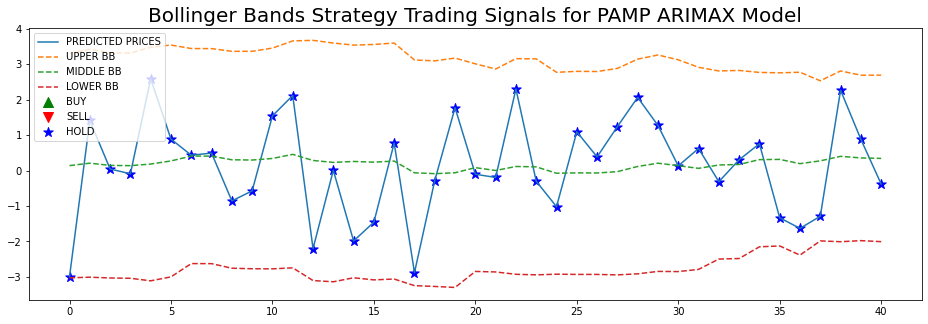

The saved percentage of money by following the model recommendations is: [-76.25000000000028]


Model  Test Score
0                  PAMP ARIMA Model    1.532500
1                 PAMP SARIMA Model    1.521174
2                 PAMP ARIMAX Model    0.480131
3                PAMP Prophet Model    1.521296
4        PAMP Univariate LSTM Model    1.631466
5      PAMP Multivariate LSTM Model    0.989335
6    PAMP Univariate ConvLSTM Model    1.615946
7  PAMP Multivariate ConvLSTM Model    1.167316

In [12]:
PAMP_models_scores = models_report(PAMP, data_name)
PAMP_models_scores

⬜ From the price figure, we can see the price started increasing from the middle of Mar and continued in this trend to the end of the dataset limit in the Q-1 of 2021.

⬜ From the box plots, we can see the price in 2021 is higher than in 2020 but we need to take into our mind that, the available data in 2021 is only for the first quarter so this could be changing with more data for the rest of the year.

⬜ The best models is ARIMAX  with mae equal to 0.48.

⬜ If the holders kept the stock, they will achieve 76% of profits.

**Cementos Argos SA Dataset (CCB)**

The first 5 rows of the CCB data set: 

                  Date   Price    Open    High     Low     Vol.  Change %
0  2021-03-31 00:00:00  5150.0  5100.0  5170.0  5100.0  212.44K    0.0098
1  2021-03-30 00:00:00  5100.0  5010.0  5100.0  5010.0  583.70K    0.0109
2  2021-03-29 00:00:00  5045.0  5020.0  5045.0  5015.0  117.54K    0.0050
3  2021-03-26 00:00:00  5020.0  5085.0  5085.0  4980.0  203.46K   -0.0020
4  2021-03-25 00:00:00  5030.0  5035.0  5045.0  4950.0  317.06K    0.0010

******************************************************************************************************************************************************
The original price values: 
The time series is not stationary and the p-value is 0.23528318144575583
The price values after difference: 
The time series is stationary and the p-value is 1.2918069920928596e-11


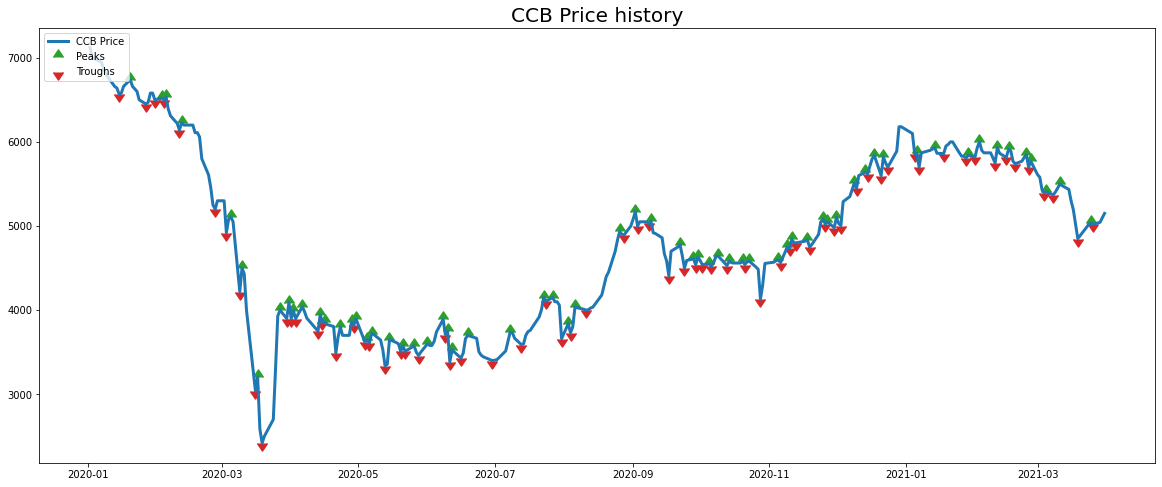

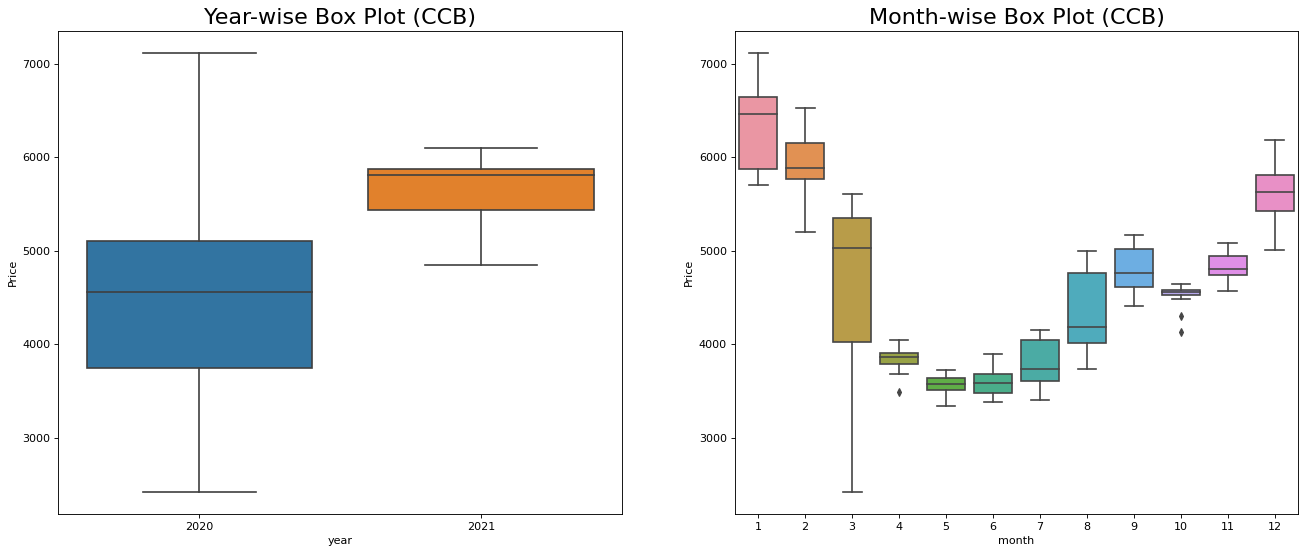

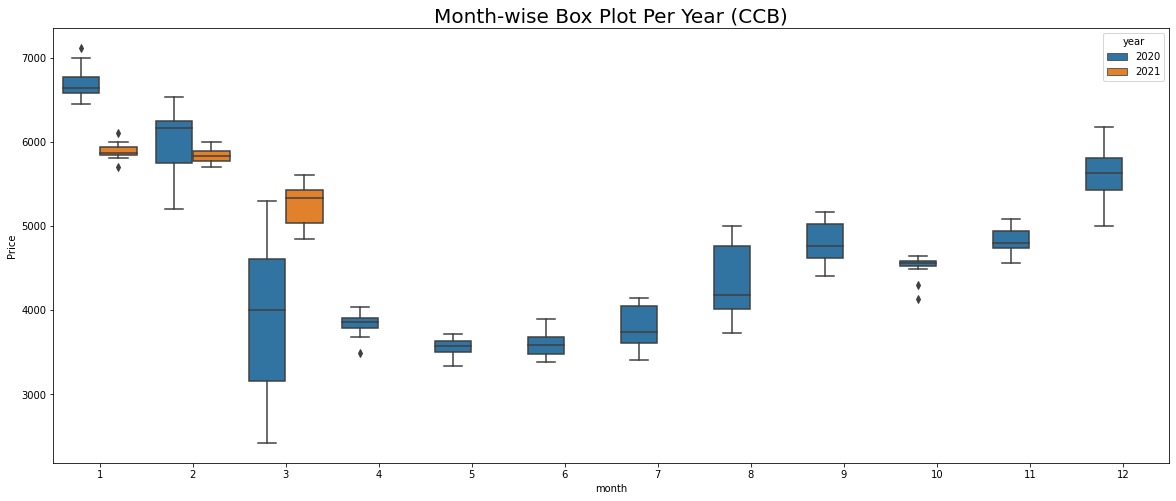

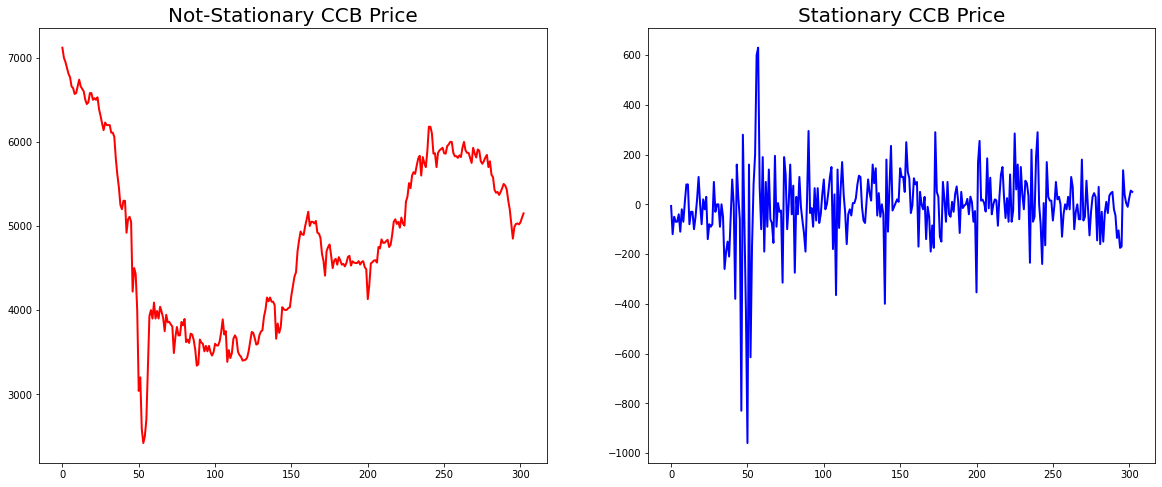

In [13]:
CCB, data_name = analysis_report('CCB', 5)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -5.34187
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       318.204   3.86875e-08       97.2096      0.5992      0.5992      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103       318.204   2.84723e-09       97.6881      0.2916      0.2916      133   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


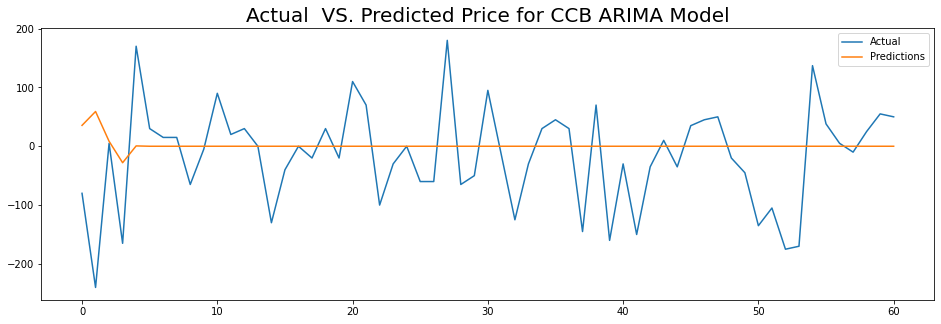

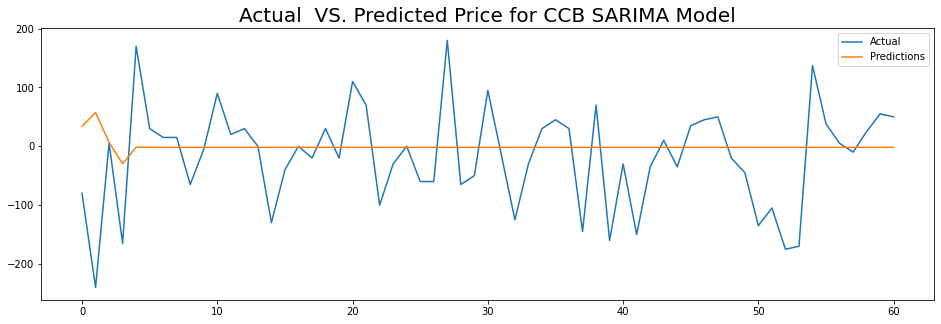

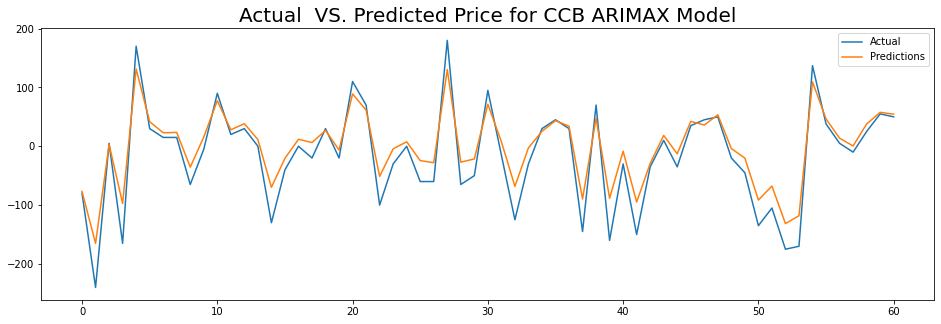

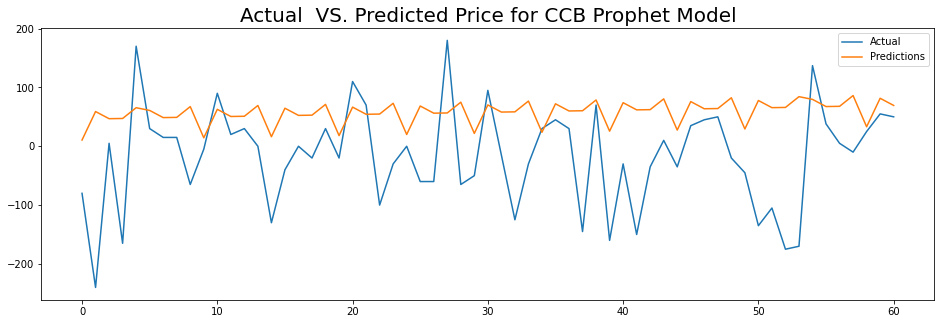

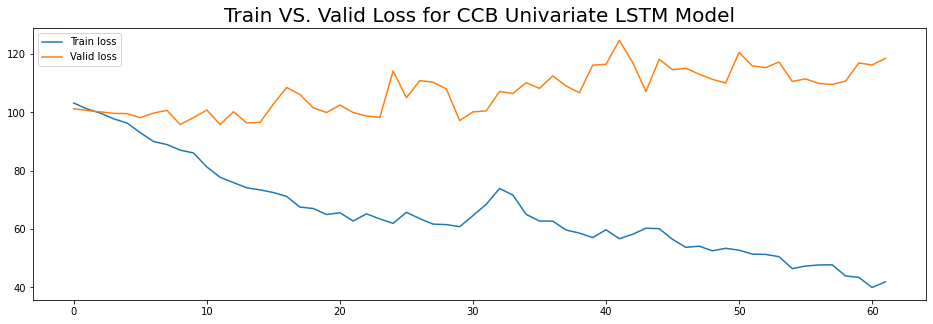

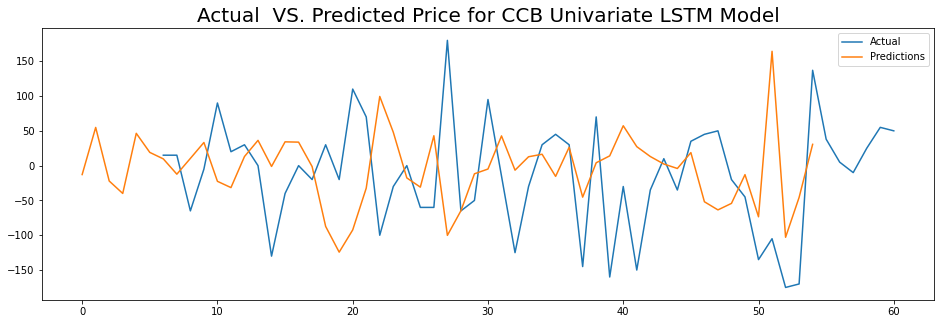

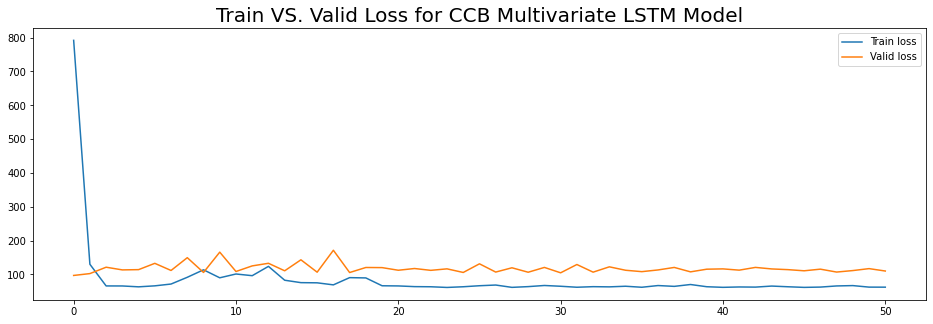

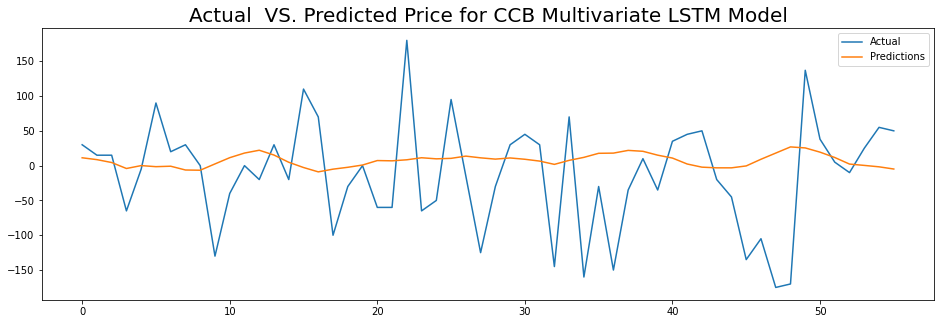

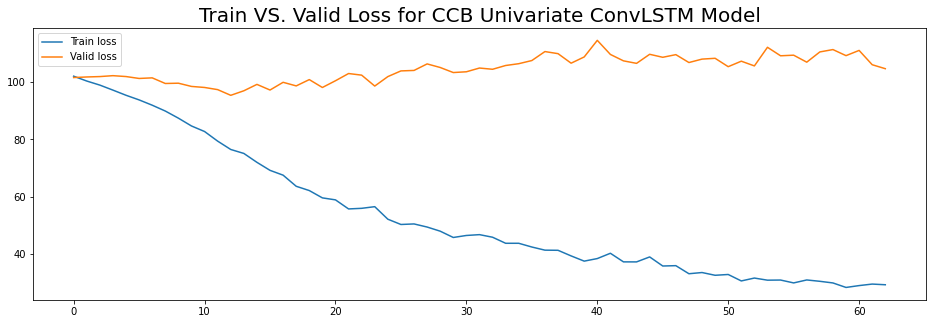

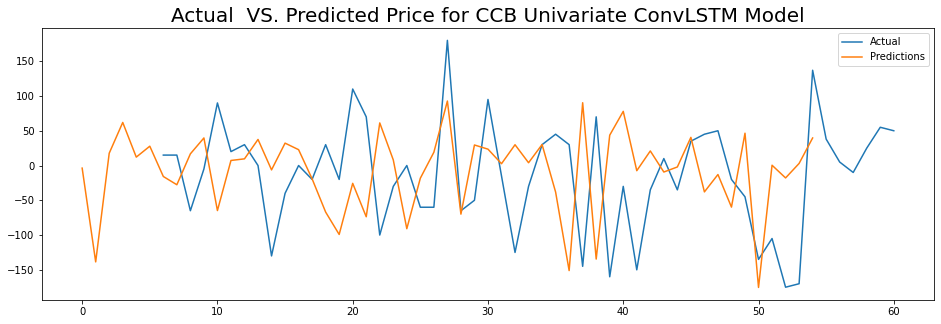

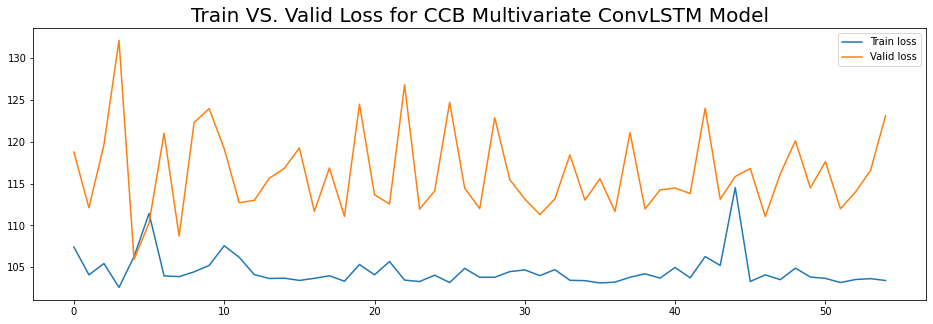

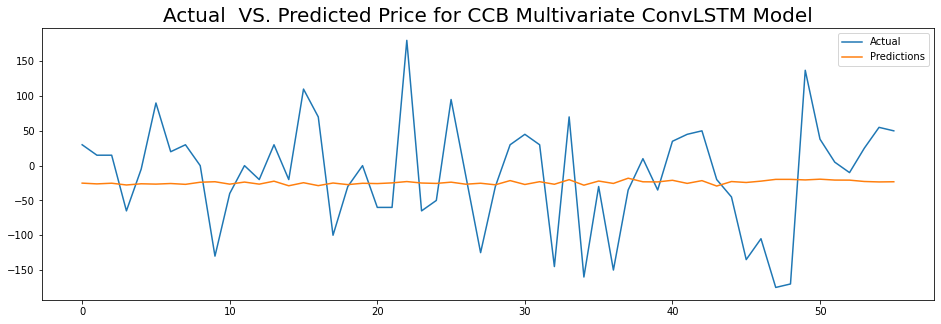

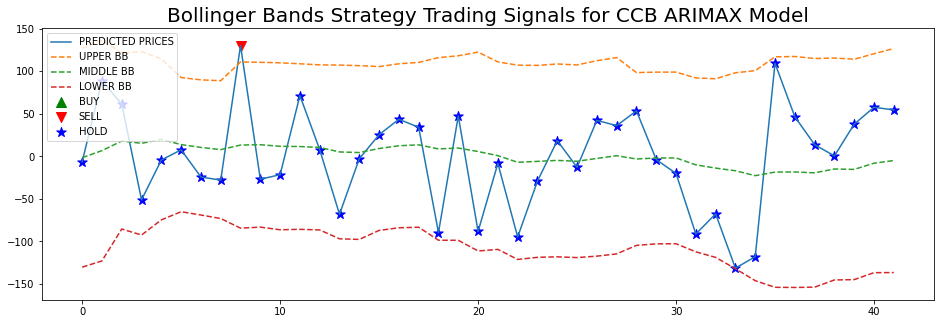

The saved percentage of money by following the model recommendations is: [-72.22222222222221]


Model  Test Score
0                  CCB ARIMA Model   66.630253
1                 CCB SARIMA Model   66.549800
2                 CCB ARIMAX Model   23.784223
3                CCB Prophet Model   87.619238
4        CCB Univariate LSTM Model   76.397458
5      CCB Multivariate LSTM Model   62.153948
6    CCB Univariate ConvLSTM Model   79.824231
7  CCB Multivariate ConvLSTM Model   61.532497

In [14]:
CCB_models_scores = models_report(CCB, data_name)
CCB_models_scores

 From the price figure, after a huge loss with the stock price by around 70% of their value to the Middle of Mar, the price corrected itself to the end of the Q-1 of 2021 and the price still is lower than the last highest peak by around 
1000$.


⬜ From the box plots, we can see the price in 2021 is lower than in 2020 in the first two months, but we need to take into our mind that, the available data in 2021 is only for the first quarter so this could be changing with more data 
for the rest of the year.

⬜ The best models is ARIMAX  with mae equal to 23.776011.

⬜ By selling the stock, the holders saved 72% of the loss.


**Impala Platinum Holdings Limited Dataset (IMPJ)**

The first 5 rows of the IMPJ data set: 

                  Date    Price     Open     High      Low   Vol.  Change %
0  2021-03-31 00:00:00  27373.0  26980.0  27526.0  26657.0  2.49M    0.0177
1  2021-03-30 00:00:00  26898.0  26766.0  27443.0  26360.0  3.02M   -0.0030
2  2021-03-29 00:00:00  26980.0  27800.0  28174.0  26614.0  4.44M   -0.0201
3  2021-03-26 00:00:00  27533.0  27083.0  28006.0  26728.0  3.36M    0.0365
4  2021-03-25 00:00:00  26564.0  25954.0  27128.0  25954.0  2.83M    0.0255

******************************************************************************************************************************************************
The original price values: 
The time series is not stationary and the p-value is 0.970616784417502
The price values after difference: 
The time series is stationary and the p-value is 2.401750121431217e-12


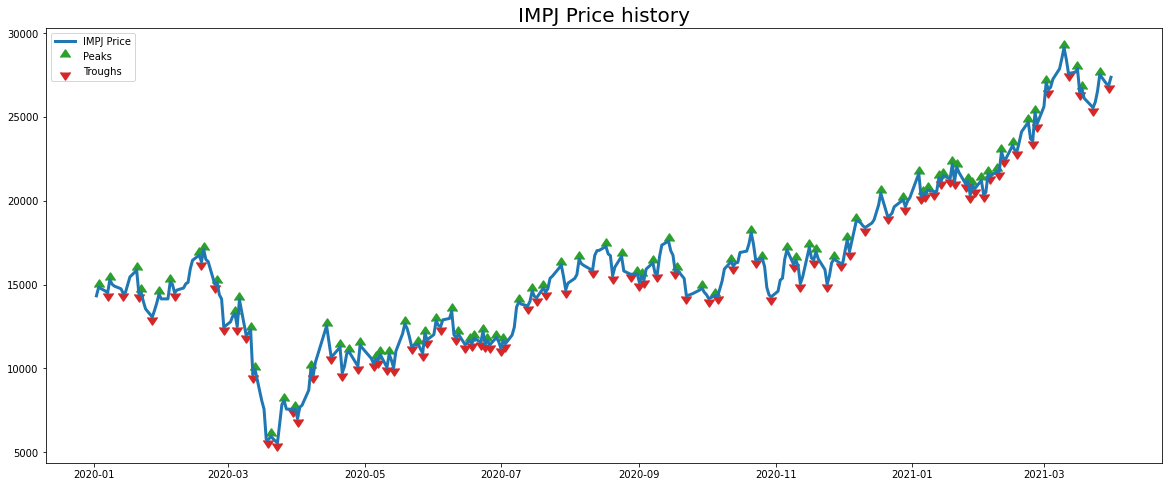

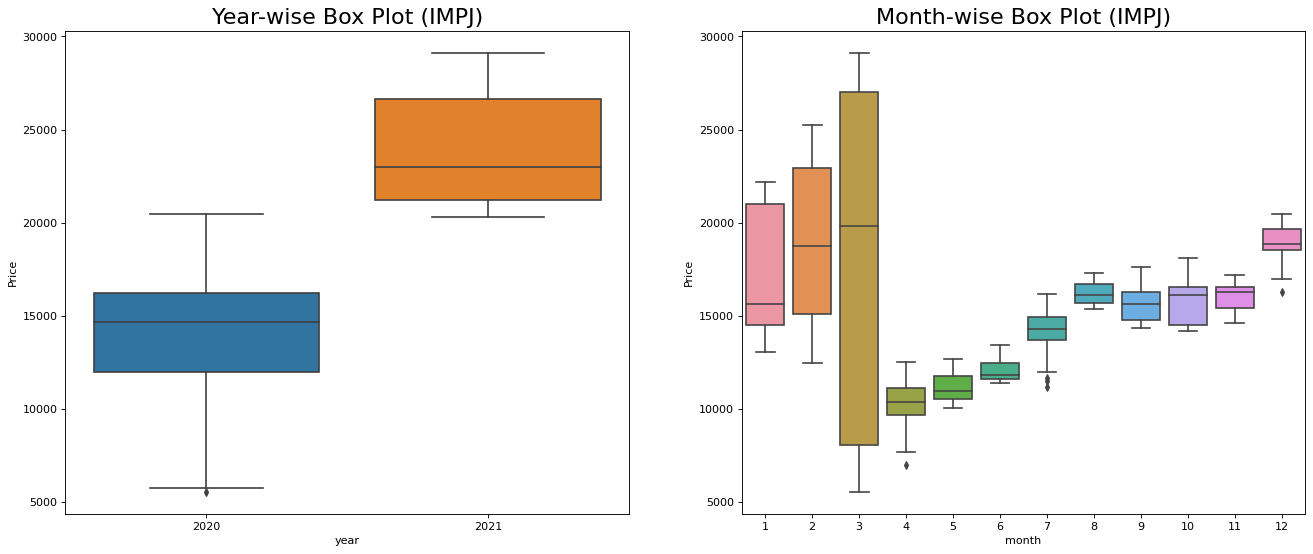

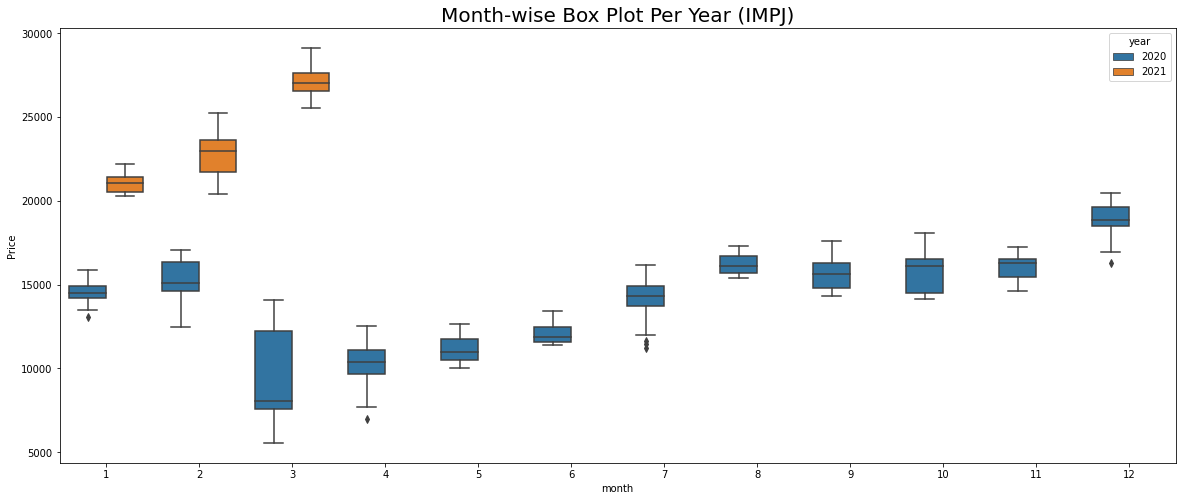

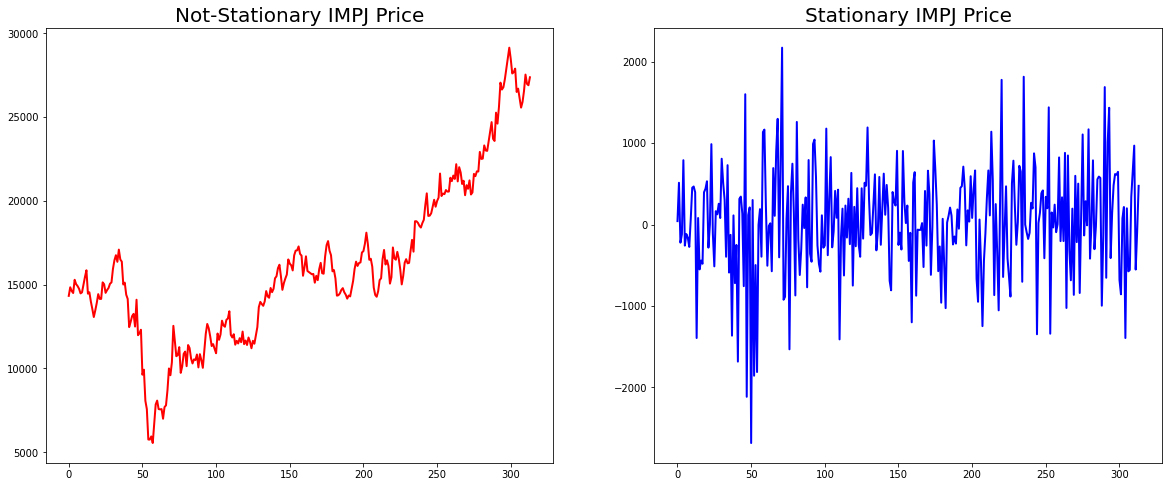

In [15]:
IMPJ, data_name = analysis_report('IMPJ', 6)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -9.66332
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95        229.86   1.21614e-06       102.009   1.209e-08       0.001      159  LS failed, Hessian reset 
      99        229.86   1.77457e-07       97.1114      0.6303      0.6303      164   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     110        229.86   8.18834e-09       101.271      0.1926      0.1926      177   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


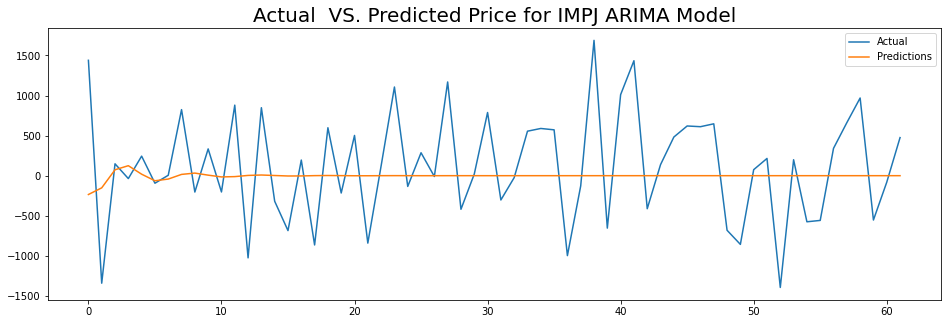

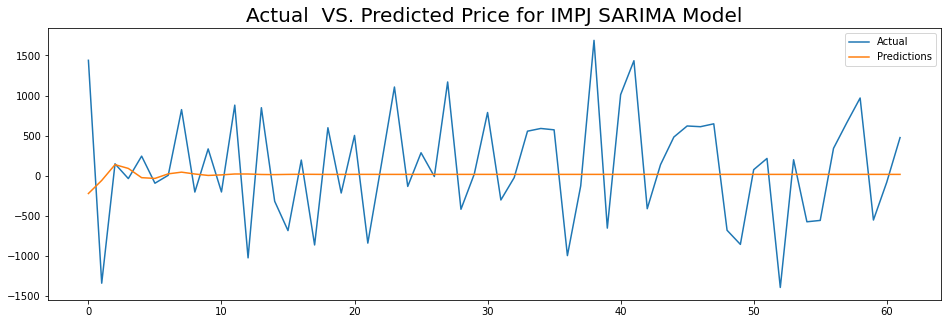

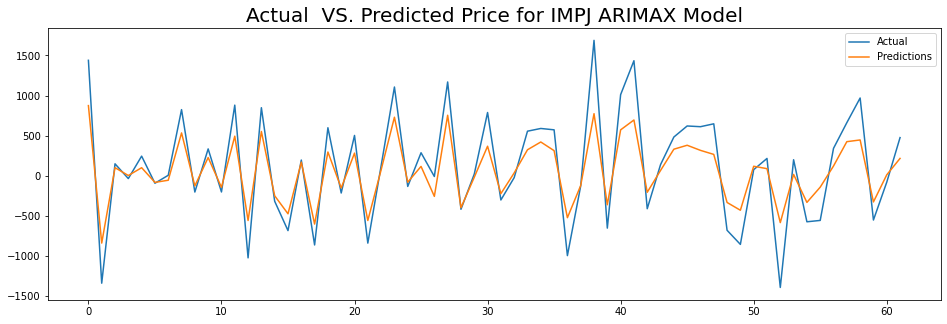

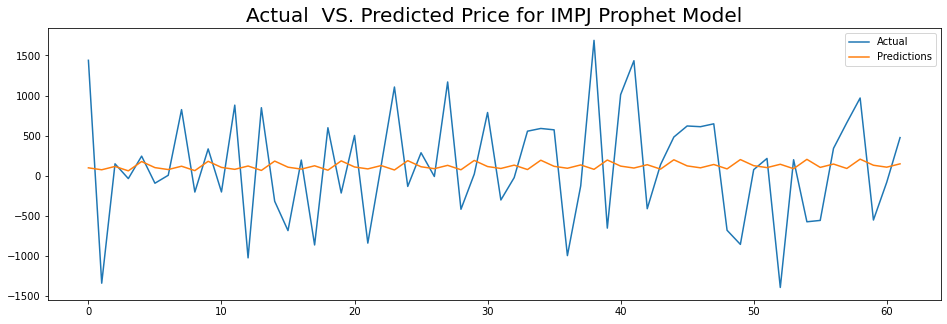

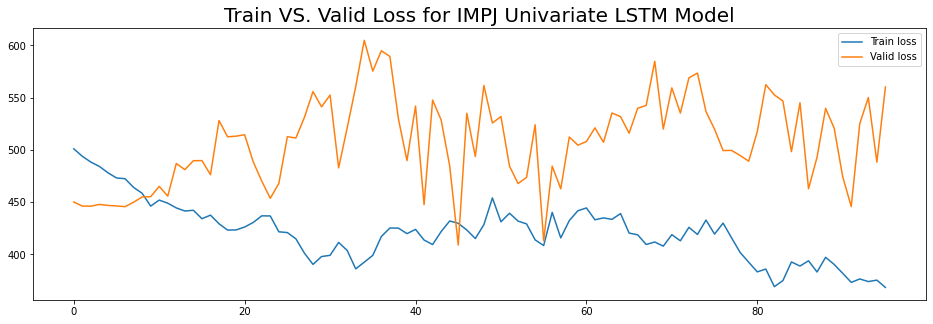

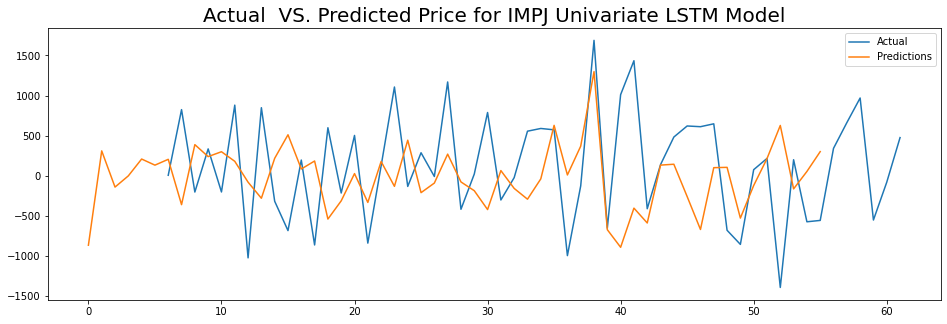

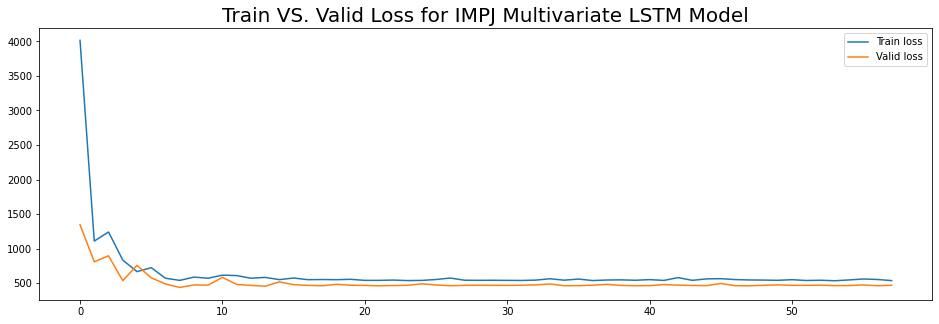

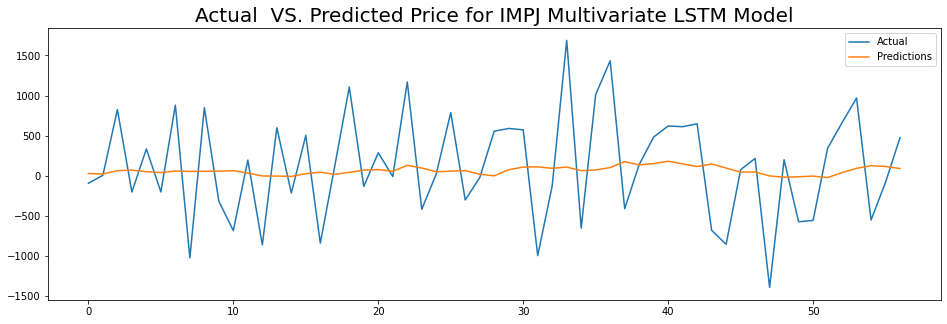

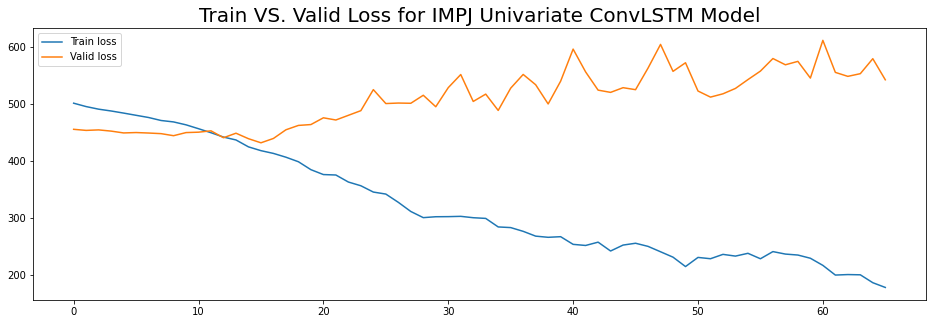

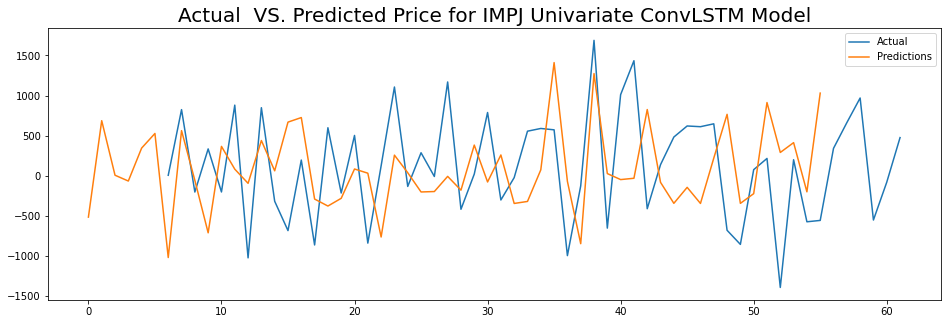

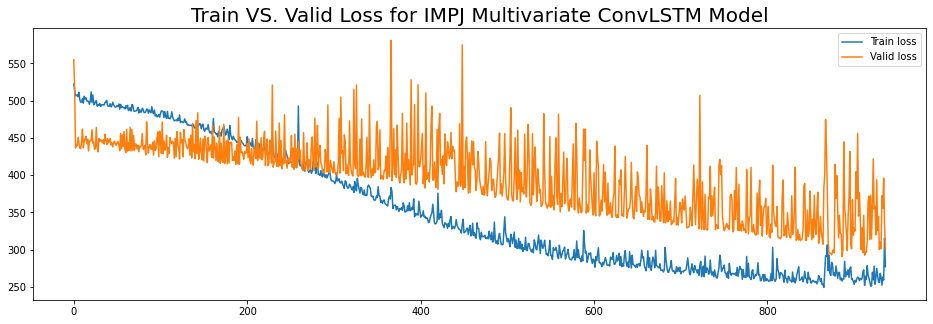

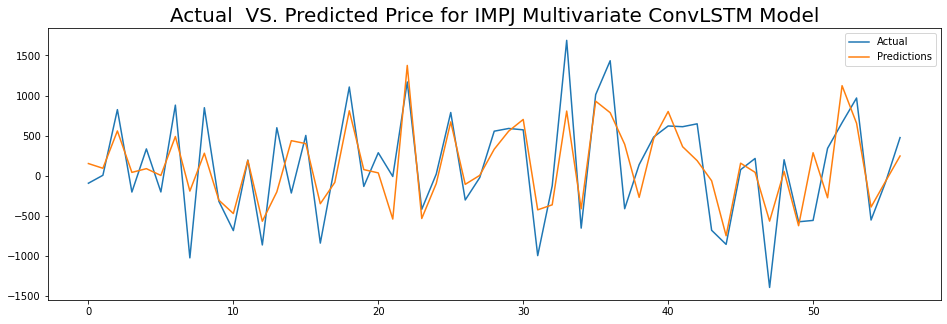

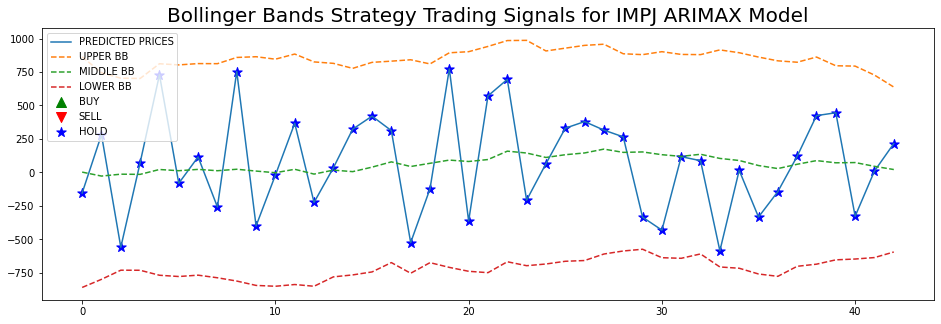

The saved percentage of money by following the model recommendations is: [-319.9074074074074]


Model  Test Score
0                  IMPJ ARIMA Model  556.359696
1                 IMPJ SARIMA Model  554.613526
2                 IMPJ ARIMAX Model  248.927393
3                IMPJ Prophet Model  550.971655
4        IMPJ Univariate LSTM Model  576.173930
5      IMPJ Multivariate LSTM Model  538.482413
6    IMPJ Univariate ConvLSTM Model  568.522213
7  IMPJ Multivariate ConvLSTM Model  311.342987

In [16]:
IMPJ_models_scores = models_report(IMPJ, data_name)
IMPJ_models_scores

⬜ From the price figure, after a huge loss with the stock price by around 70% of their value to the Middle of Mar, the price corrected itself to the end of the Q-1 of 2021 and the price exceed the is the last highest peak by around double.


⬜ From the box plots, we can see the price in 2021 is higher than in 2020, but we need to take into our mind that, the available data in 2021 is only for the first quarter so this could be changing with more data for the rest of the year.

⬜ The best models is ARIMAX  with mae equal to 248.927389.

⬜ If the holders kept the stock, they will achieve 319% of profits.

**Dongkuk Steel Dataset (DSMCL)**

The first 5 rows of the DSMCL data set: 

                  Date    Price     Open     High      Low   Vol.  Change %
0  2021-03-31 00:00:00  13650.0  13700.0  13750.0  13450.0  0.19K    0.0000
1  2021-03-30 00:00:00  13650.0  13850.0  14200.0  13050.0  3.17M    0.0074
2  2021-03-29 00:00:00  13550.0  12500.0  13800.0  12500.0  0.20K    0.1107
3  2021-03-28 00:00:00  12200.0  12200.0  12200.0  12200.0      -    0.0000
4  2021-03-26 00:00:00  12200.0  11500.0  12300.0  11350.0  2.34M    0.0796

******************************************************************************************************************************************************
The original price values: 
The time series is not stationary and the p-value is 0.9984422562038119
The price values after difference: 
The time series is stationary and the p-value is 2.7858717113999243e-21


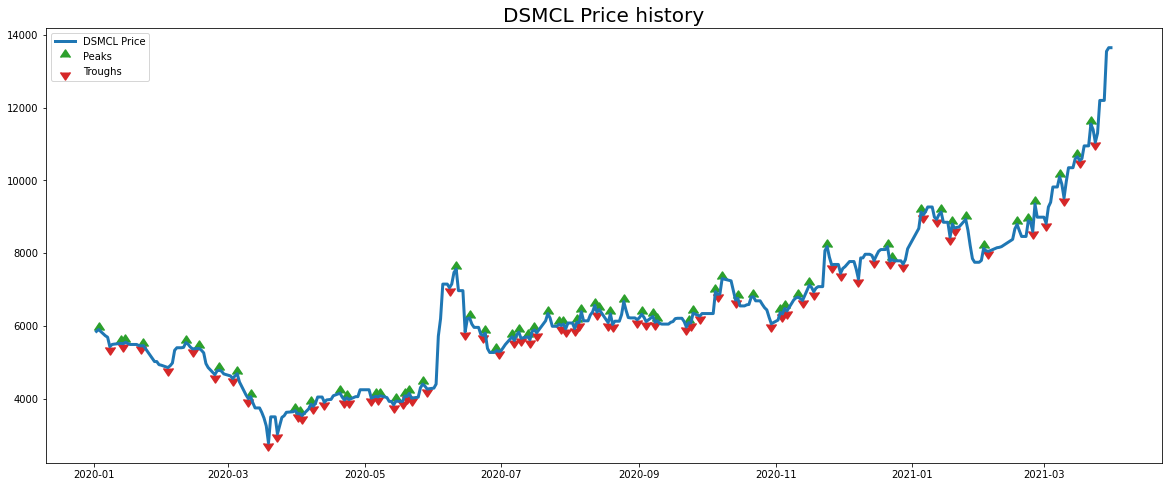

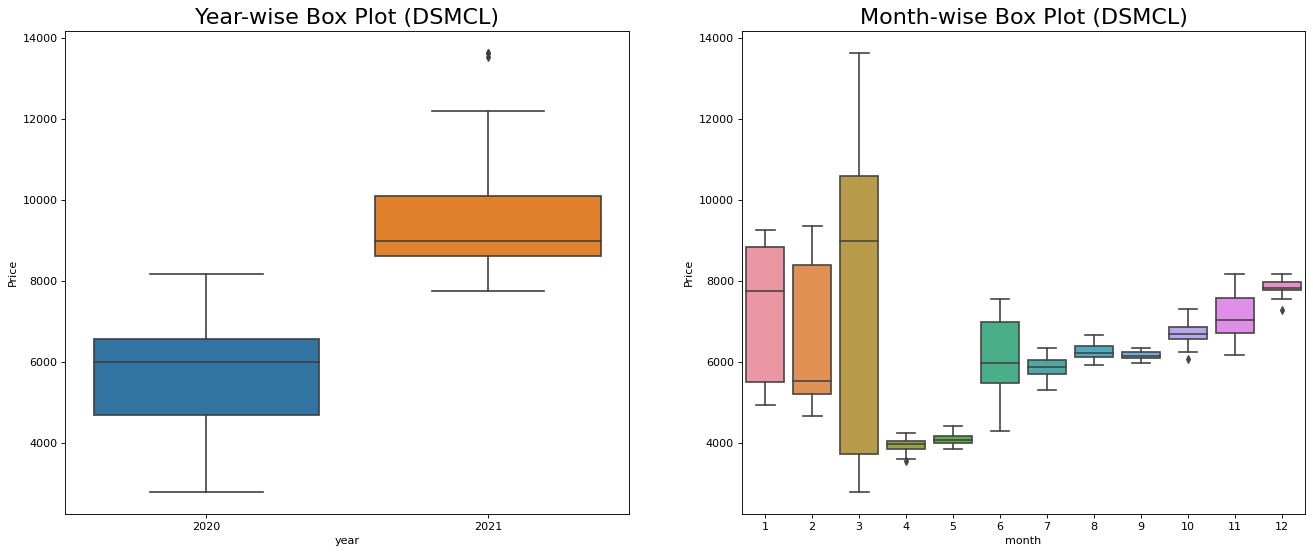

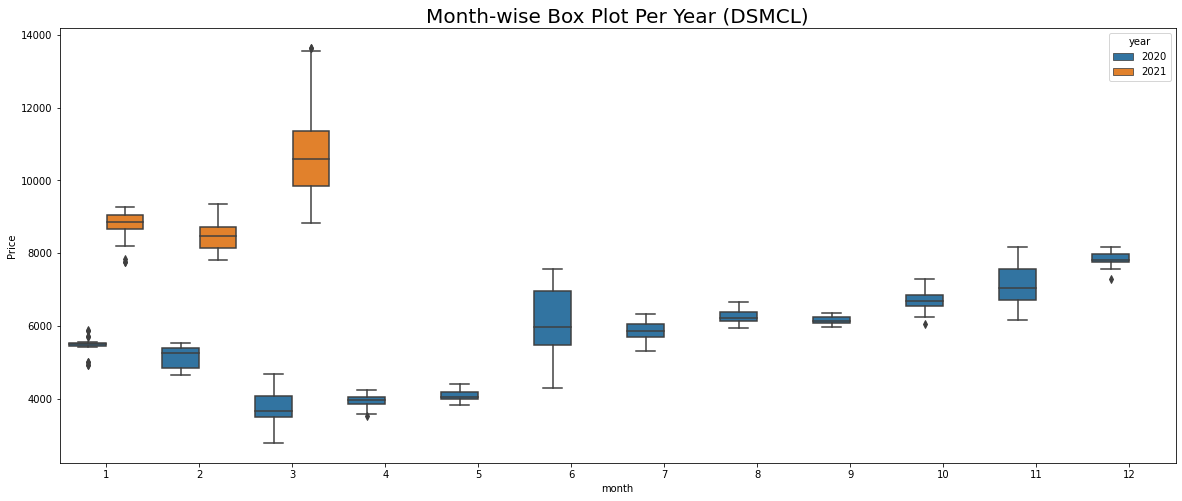

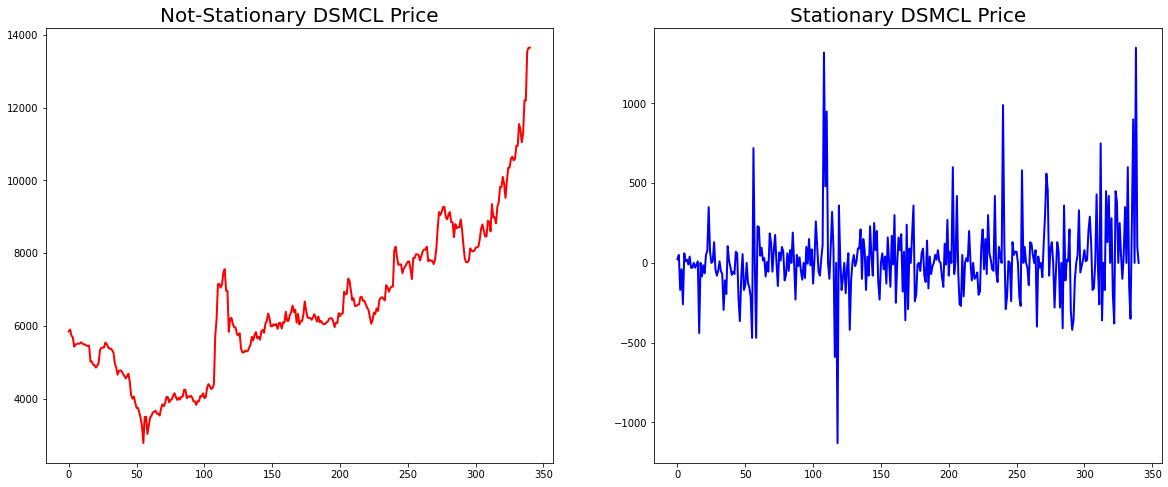

In [17]:
DSMCL, data_name = analysis_report('DSMCL', 7)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -7.72384
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        363.77   1.36353e-06       81.2911      0.3762           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     119        363.77   7.44519e-09        102.27      0.4684      0.4684      154   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


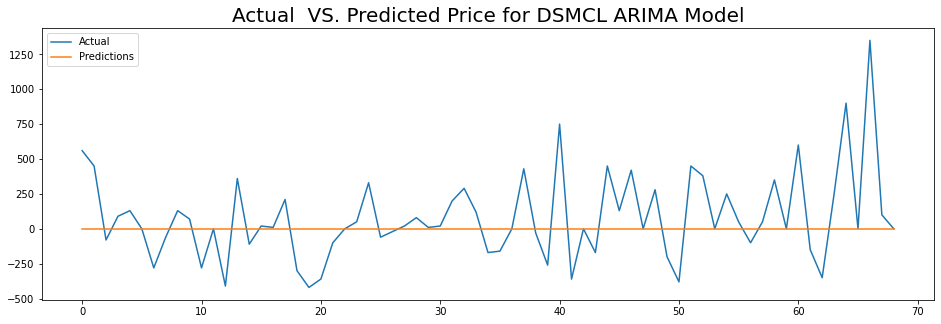

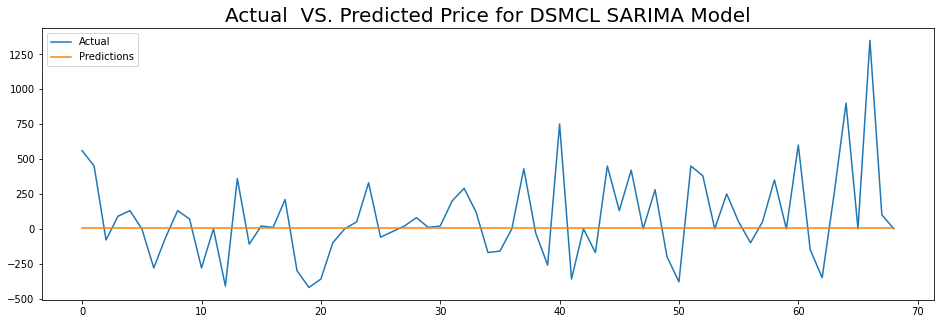

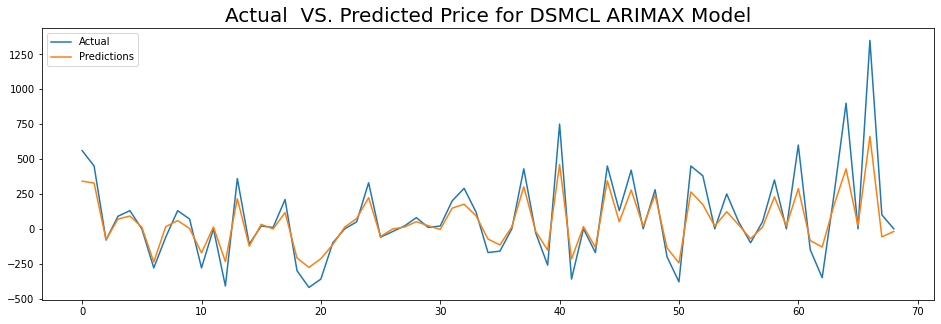

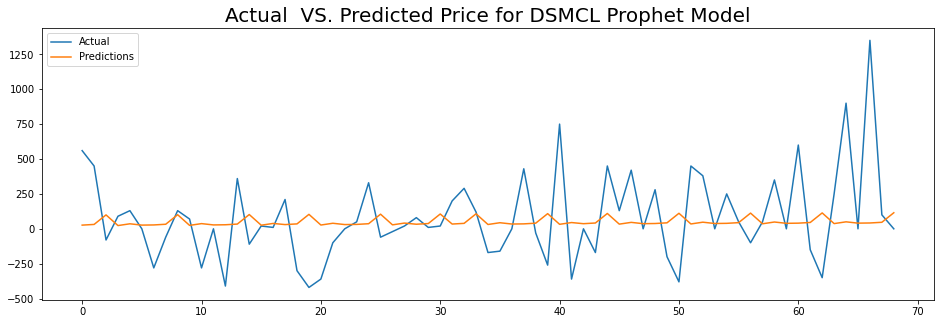

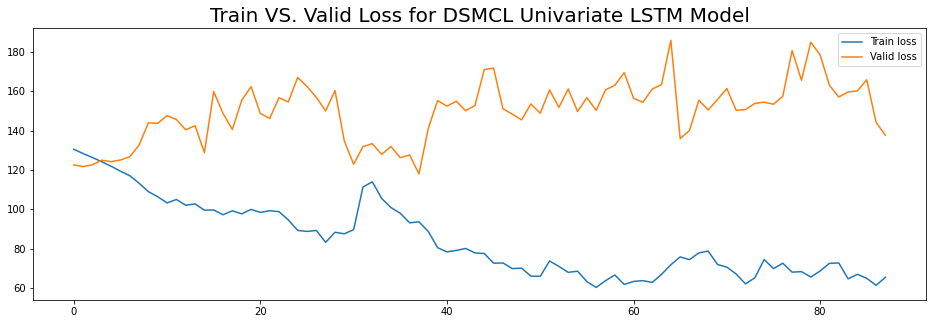

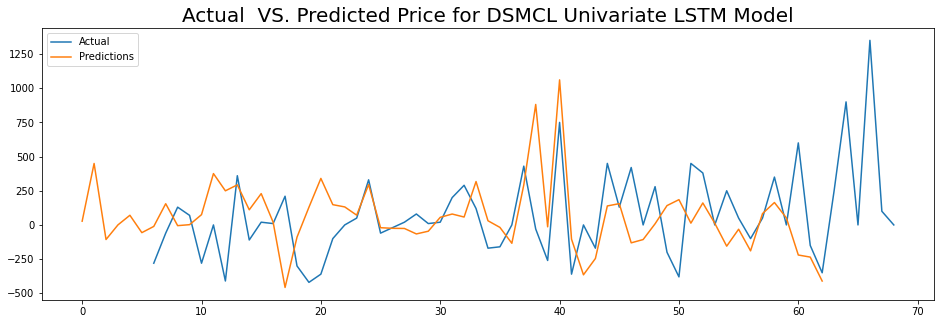

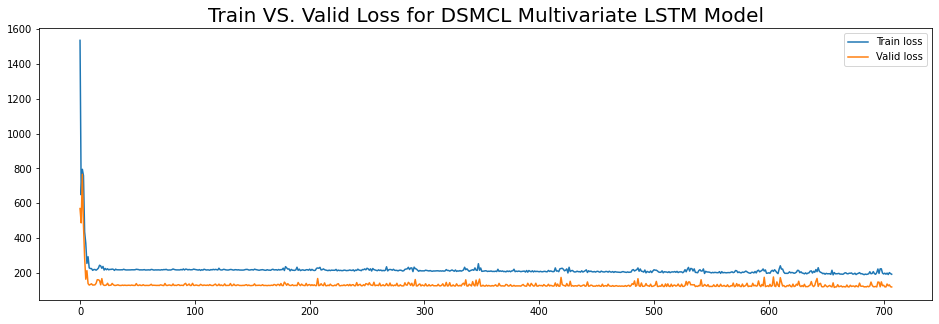

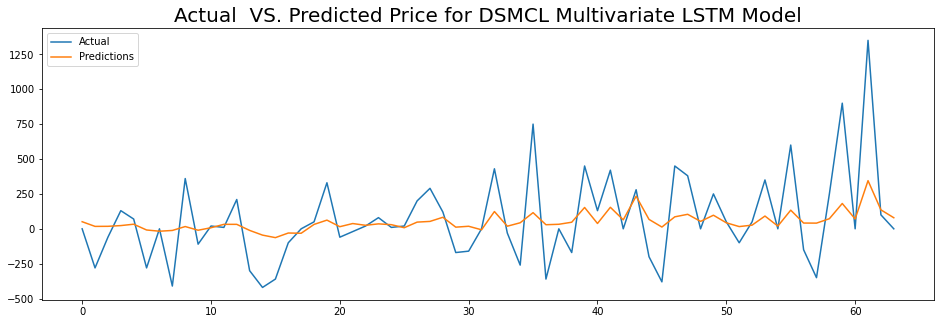

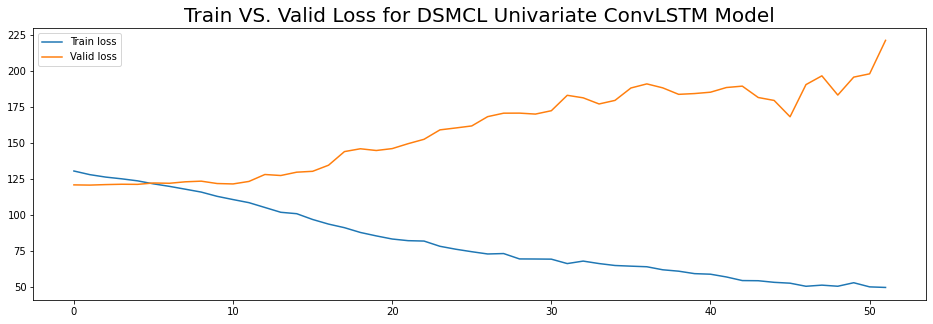

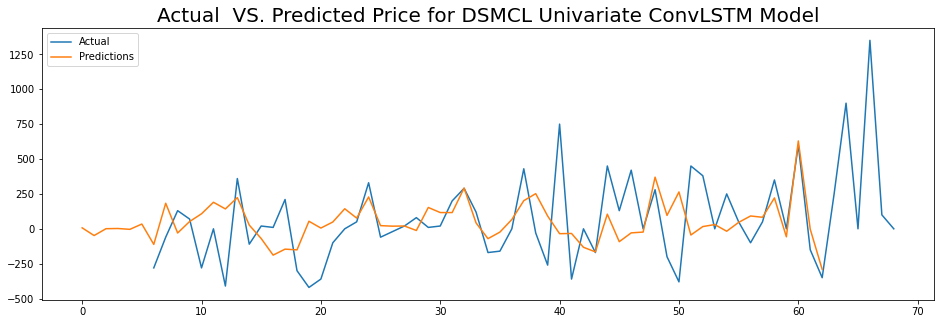

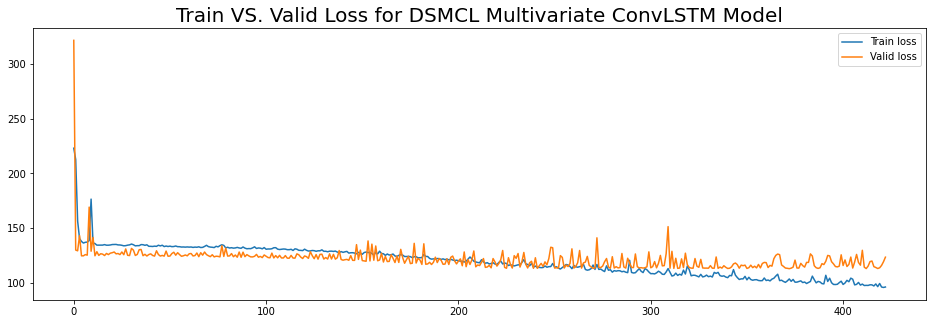

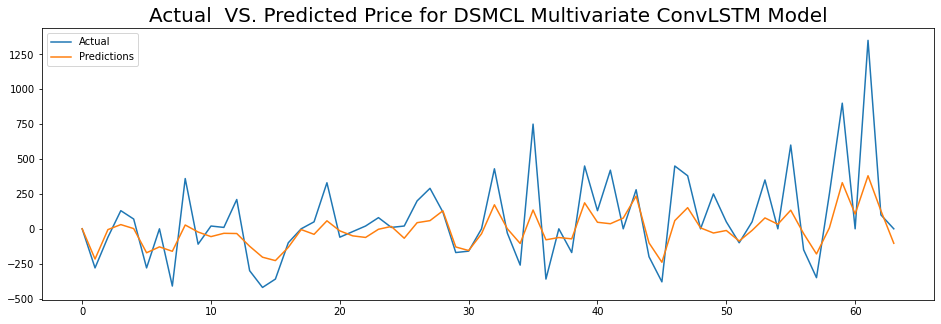

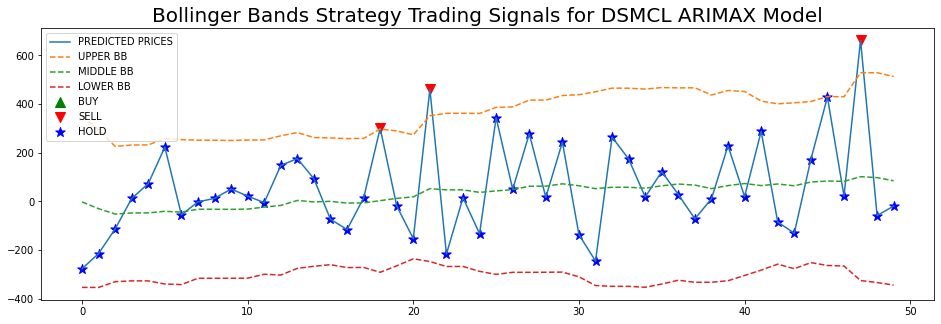

The saved percentage of money by following the model recommendations is: [-202.38095238095238, 74.4186046511628, -100.0]


Model  Test Score
0                  DSMCL ARIMA Model  219.565217
1                 DSMCL SARIMA Model  219.198699
2                 DSMCL ARIMAX Model   91.772587
3                DSMCL Prophet Model  227.800426
4        DSMCL Univariate LSTM Model  298.338759
5      DSMCL Multivariate LSTM Model  188.000371
6    DSMCL Univariate ConvLSTM Model  237.245815
7  DSMCL Multivariate ConvLSTM Model  156.349304

In [18]:
DSMCL_models_scores = models_report(DSMCL, data_name)
DSMCL_models_scores

⬜ From the price figure, after a huge loss with the stock price by around 200$ of their value to the Middle of Mar, 
the price corrected itself to the end of the Q-1 of 2021 and the price exceed the is the last highest peak by around 13000$.

⬜ From the box plots, we can see the price in 2021 is higher than in 2020, but we need to take into our mind that, the available data in 2021 is only for the first quarter so this could be changing with more data for the rest of the year.

⬜ The best models is ARIMAX  with mae equal to 90.913305.

⬜ By selling the stock with the first recommendation, the holders saved 202% of the loss and 74% and 100% for 
the second and final recommendation respectively.